<a href="https://colab.research.google.com/github/bmnds/uea-data-science-04-data-processing/blob/main/trabalho-final/Notebook_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

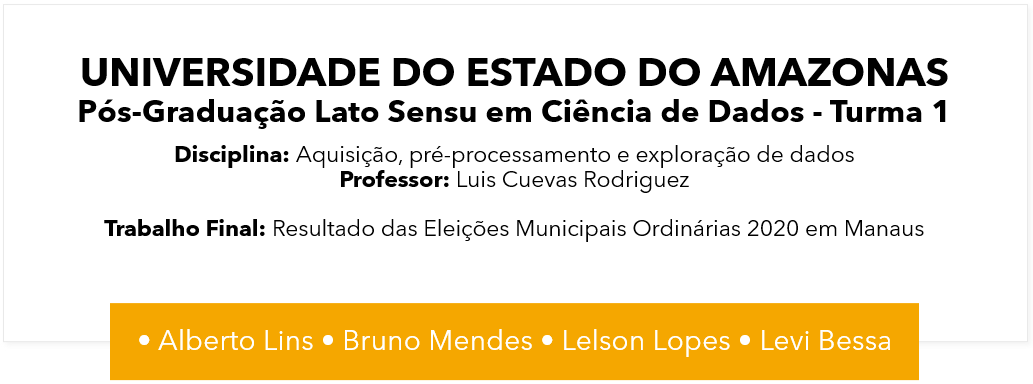

In [ ]:
!pwd

/content


In [ ]:
# Importando libs necessárias
import pandas as pd

# Eleições Municipais Ordinárias 2020

**Delimitação:** Neste trabalho será analisado o resultado das Eleições Municipais Ordinárias 2020 em Manaus para os cargos de Prefeito e Vereador.

Neste notebook faremos a extração, transformação e carga dos dados de diferentes fontes para subsiduar as análises do Trabalho Final da Disciplina de Aquisição e Pré-processamento de Dados.

## 1. Primeira Fonte de Dados Escolhida

Inicialmente, a equipe tentou extrair os dados diretamente do Portal de Resultados publicado pelo TSE: https://resultados.tse.jus.br/oficial

Principais desafios:
* Aprender sobre *Web Scrapping*;
* Páginas dinâmicas tornam a tarefa mais difícil;
* Dado não estruturado conforme a nossa necessidade;
* Não possuía todos dados necessários para a nossa análise;
* Prazo curto para conclusão.

## 2. Segunda Fonte de Dados Escolhida

Após o TSE atualizar os dados no Repositório de Dados Eleitoriais, optamos por mudar a principal fonte de dados para: https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais

Vantagens:
*   Dado já estruturado e em formato aberto (*.zip* e *.csv*)
*   Possui dados além do resultado das eleições, tais como:
    *   Locais de votação;
    *   Estatísticas demográficas do eleitorado;
    *   Gastos de campanha;  
    *   Bens dos candidatos e etc.



Adicionalmente, também coletamos informações a partir do Portal de Indicadores em Mapa para o município de Manaus, publicados pela SEDECTI: http://www.sedecti.am.gov.br/indicadores-mapa/

## 3. Processo ETL definido

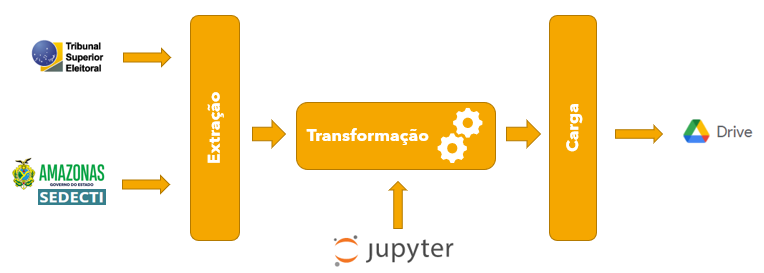

## 4. Estrutura do Dataset

| Atributo | Descrição |
| --- | --- |
| zona | Zona eleitoral |
| secao | Seção eleitoral |
| escola | Escola onde a seção eleitoral está situada |
| bairro | Bairro onde a escola está localizada
| lat | Latitude do ponto onde a escola está localizada |
| long | Longitude od ponto onde a escola está localizada |
| aptos | Quantidade de eleitores aptos a votar |
| votos | Quantidade de eleitores que votou (1o turno) |
| abstencoes | Quantidade de eleitores que não compareceu (1o turno) |
| votos_2t | Quantidade de eleitores que votou (2o turno) |
| abstencoes_2t | Quantidade de eleitores que não compareceu (2o turno) |
| masculino | Quantidade de eleitores do gênero masculino na seção |
| feminino | Quantidade de eleitores do gênero feminido |
| jovem | Quantidade de eleitores classificados como jovens |
| adulto | Quantidade de eleitores classificados como adultos |
| idoso | Quantidade de eleitores com idade avançada |
| casado | Quantidade de eleitores casados |
| divorciado | Quantidade de eleitores divorciados |
| separado | Quantiodade de eleitores separadaos |
| solteiro | Quantidade de eleitores solteiros |
| viuvo | Quantidade de eleitores viúvos |
| analfabeto | Quantidade de eleitores analfabetos |
| le_e_escreve | Quantidade de eleitores que sabem ler e escrever, mas não cursaram nem o fundamental |
| ensino_fundamental | Quantidade de eleitores que cursaram ou estão cursando o ensino fundamental |
| ensino_medio | Quantidade de eleitores que cursaram ou estão cursando o endino médio |
| ensino_superior | Quantidade de eleitores que estão cursando ou já cursaram o ensino superior |
| candidato_{nth} | Nome do candidato a prefeito que ficou na n-ésima colocação (1o turno) |
| partido_{nth} | Partido do candidato a prefeito que ficou na n-ésima colocação (1o turno) |
| votos_{nth} | Votos computados para o candidato a que ficou na n-ésima colocação (1o turno) |
| partido_{nth}_ver | Partido/legenda dos vereadores que ficou na n-ésima colocação (1o turno) |
| votos_{nth}_ver | Votos no partido/legenda dos vereadores que ficou na n-ésima colocação (1o turno) |
| candidato_2t_{nth} | Nome do candidato a prefeito que ficou na n-ésima colocação (2o turno) |
| partido_2t_{nth} | Partido do candidato a prefeito que ficou na n-ésima colocação (2o turno) |
| votos_2t_{nth} | Votos computados para o candidato a que ficou na n-ésima colocação (2o turno) |

# Extração

In [ ]:
# Montar o diretório compartilhado do Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive

Mounted at /content/gdrive
/content/gdrive


In [ ]:
# Listar arquivos do diretório compartilhado
%cd MyDrive/uea-data-science/04-data-processing/trabalho-final/datasets
!ls

/content/gdrive/MyDrive/uea-data-science/04-data-processing/trabalho-final/datasets
bweb_1t_AM_181120201549.zip
bweb_2t_AM_301120201245.zip
csv
dados-bairros-manaus.zip
detalhe_votacao_secao_2020.zip
eleitorado_local_votacao_2020.zip
perfil_comparecimento_abstencao_2020.zip
perfil_eleitorado_2020.zip
perfil_eleitor_secao_2020_AM.zip
prestacao_contas_anual_partidaria_2020.zip
prestacao_de_contas_eleitorais_candidatos_2020.zip
votacao_candidato_munzona_2020.zip
votacao_secao_2020_AM.zip


# Transformação

In [ ]:
!mkdir /content/work #diretório temporário de trabalho
!mkdir /content/datasets #diretório com os arquivos processados

mkdir: cannot create directory ‘/content/work’: File exists
mkdir: cannot create directory ‘/content/datasets’: File exists


## Dados de Boletins de Urna

In [ ]:
# boletins de urna do 1o turno
!unzip -u bweb_1t_AM_181120201549.zip -d /content/work

Archive:  bweb_1t_AM_181120201549.zip
  inflating: /content/work/bweb_1t_AM_181120201549.csv  
  inflating: /content/work/leiame-boletimurnaweb.pdf  


In [ ]:
!cp /content/work/leiame-boletimurnaweb.pdf /content/datasets/leiame-boletim_urna.pdf

In [ ]:
df_bu_1t = pd.read_csv('/content/work/bweb_1t_AM_181120201549.csv', encoding="ISO-8859-1", delimiter=';')
df_bu_1t.sample(5)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
442901,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,AM,2550,MANAUS,40,509,1538,13,Vereador,45,PSDB,Partido da Social Democracia Brasileira,15/11/2020 18:50:15,387,322,65,1,APURADA,1,Nominal,45455,ROSIVALDO CORDOVIL,1,1765341,081.636.525.198.132.204.,237.595,7D4ACF5A,12/11/2020 15:08:00,13 - 509,#NULO#,15/11/2020 07:08:34,15/11/2020 17:05:31,0,15/11/2020 17:09:03,-1,-1
361105,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,AM,98477,TABATINGA,36,27,1120,13,Vereador,15,MDB,Movimento Democrático Brasileiro,15/11/2020 20:05:06,399,306,93,1,APURADA,1,Nominal,15222,PROF CLAUDINEI,1,1615977,711.058.628.166.762.723.,303.815,3DAA106A,07/11/2020 09:47:00,13 - 27,#NULO#,15/11/2020 07:00:00,15/11/2020 17:07:34,0,15/11/2020 17:10:41,-1,-1
770072,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,AM,2550,MANAUS,68,541,1813,13,Vereador,22,PL,Partido Liberal,15/11/2020 21:22:00,386,315,71,1,APURADA,4,Legenda,22,PL,1,1179770,637.193.476.384.592.537.,99.401,ED794D61,05/11/2020 14:06:00,13 - 541,#NULO#,15/11/2020 07:00:00,15/11/2020 17:06:17,0,15/11/2020 17:07:50,-1,-1
758529,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,AM,2550,MANAUS,65,631,1813,13,Vereador,65,PC do B,Partido Comunista do Brasil,15/11/2020 18:56:52,321,217,104,1,APURADA,1,Nominal,65010,YANN EVANOVICK,1,1063531,091.706.958.883.509.344.,701.989,AFB87E7E,06/11/2020 15:27:00,13 - 631,#NULO#,15/11/2020 07:00:00,15/11/2020 17:07:35,0,15/11/2020 17:10:25,-1,-1
608123,18/11/2020,15:49:53,2020,0,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020,AM,2550,MANAUS,62,353,1660,13,Vereador,28,PRTB,Partido Renovador Trabalhista Brasileiro,15/11/2020 18:38:51,431,357,74,1,APURADA,1,Nominal,28111,BEATRIZ FERNANDES,1,1181396,980.662.938.539.763.614.,985.620,797ECDE3,07/11/2020 08:36:00,13 - 353,#NULO#,15/11/2020 07:01:39,15/11/2020 17:03:21,0,15/11/2020 17:04:55,-1,-1


In [ ]:
df_bu_1t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848941 entries, 0 to 848940
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DT_GERACAO                   848941 non-null  object 
 1   HH_GERACAO                   848941 non-null  object 
 2   ANO_ELEICAO                  848941 non-null  int64  
 3   CD_TIPO_ELEICAO              848941 non-null  int64  
 4   NM_TIPO_ELEICAO              848941 non-null  object 
 5   CD_PLEITO                    848941 non-null  int64  
 6   DT_PLEITO                    848941 non-null  object 
 7   NR_TURNO                     848941 non-null  int64  
 8   CD_ELEICAO                   848941 non-null  int64  
 9   DS_ELEICAO                   848941 non-null  object 
 10  SG_UF                        848941 non-null  object 
 11  CD_MUNICIPIO                 848941 non-null  int64  
 12  NM_MUNICIPIO                 848941 non-null  object 
 13 

In [ ]:
df_bu_1t.DS_CARGO_PERGUNTA.unique()

array(['Prefeito', 'Vereador'], dtype=object)

In [ ]:
df_bu_1t.SG_PARTIDO.value_counts()

PSC              62642
AVANTE           60226
REPUBLICANOS     53694
PL               40921
PATRIOTA         40139
PP               36335
PT               34365
PSDB             33885
PODE             33417
PSL              33355
PTB              32379
MDB              31878
PMN              30224
PSB              29228
PSD              27816
DC               26548
CIDADANIA        26338
PROS             26234
PV               25449
#NULO#           24702
DEM              24324
PRTB             21962
PTC              21249
SOLIDARIEDADE    17075
PC do B          16626
PDT              12287
PMB               9386
NOVO              7568
PSOL              4880
REDE              2877
PSTU               932
Name: SG_PARTIDO, dtype: int64

In [ ]:
df_bu_1t.NM_MUNICIPIO.value_counts()

MANAUS         590874
MANACAPURU      20977
ITACOATIARA     20787
PARINTINS       18377
TEFÉ            12425
                ...  
AMATURÁ          1116
ANAMÃ            1092
CANUTAMA         1033
ITAMARATI         800
JAPURÁ            583
Name: NM_MUNICIPIO, Length: 62, dtype: int64

In [ ]:
df_bu_1t.DS_TIPO_VOTAVEL.unique()

array(['Nominal', 'Nulo', 'Branco', 'Legenda'], dtype=object)

In [ ]:
df_bu_1t.DS_TIPO_URNA.unique()

array(['APURADA'], dtype=object)

In [ ]:
df_bu_1t.DS_AGREGADAS.value_counts()

#NULO#     805387
80            585
73            551
50            467
61            423
            ...  
23 / 45        24
65             19
17 / 26        19
32             17
111            14
Name: DS_AGREGADAS, Length: 294, dtype: int64

In [ ]:
df_bu_1t = df_bu_1t[df_bu_1t.NM_MUNICIPIO.eq('MANAUS')] \
                  .drop(columns=['DT_GERACAO',	'HH_GERACAO',	'CD_TIPO_ELEICAO', 'DT_BU_RECEBIDO',	'CD_TIPO_URNA', 'DS_TIPO_URNA',	
                                    'CD_TIPO_VOTAVEL',	'NR_URNA_EFETIVADA',	'CD_CARGA_1_URNA_EFETIVADA',	'CD_CARGA_2_URNA_EFETIVADA',	
                                    'CD_FLASHCARD_URNA_EFETIVADA',	'DT_CARGA_URNA_EFETIVADA',	'DS_CARGO_PERGUNTA_SECAO',	'DS_AGREGADAS',
                                    'DT_ABERTURA',	'DT_ENCERRAMENTO',	'QT_ELEITORES_BIOMETRIA_NH',	'NR_JUNTA_APURADORA',	'NR_TURMA_APURADORA'])
df_bu_1t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590874 entries, 0 to 848940
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ANO_ELEICAO        590874 non-null  int64 
 1   NM_TIPO_ELEICAO    590874 non-null  object
 2   CD_PLEITO          590874 non-null  int64 
 3   DT_PLEITO          590874 non-null  object
 4   NR_TURNO           590874 non-null  int64 
 5   CD_ELEICAO         590874 non-null  int64 
 6   DS_ELEICAO         590874 non-null  object
 7   SG_UF              590874 non-null  object
 8   CD_MUNICIPIO       590874 non-null  int64 
 9   NM_MUNICIPIO       590874 non-null  object
 10  NR_ZONA            590874 non-null  int64 
 11  NR_SECAO           590874 non-null  int64 
 12  NR_LOCAL_VOTACAO   590874 non-null  int64 
 13  CD_CARGO_PERGUNTA  590874 non-null  int64 
 14  DS_CARGO_PERGUNTA  590874 non-null  object
 15  NR_PARTIDO         590874 non-null  int64 
 16  SG_PARTIDO         5

### Candidatos a Prefeito

In [ ]:
df_prefeitos = df_bu_1t[df_bu_1t.DS_CARGO_PERGUNTA.eq('Prefeito') & df_bu_1t.DS_TIPO_VOTAVEL.eq('Nominal')] \
                      [['CD_ELEICAO','DS_CARGO_PERGUNTA','NR_VOTAVEL','SG_PARTIDO','NM_VOTAVEL']] \
                         .drop_duplicates() \
                         .sort_values(['NR_VOTAVEL'])
df_prefeitos.columns = ['eleicao',	'cargo',	'numero', 'partido', 'candidato']
df_prefeitos

,eleicao,cargo,numero,partido,candidato
6,426,Prefeito,10,REPUBLICANOS,CAPITÃO ALBERTO NETO
9,426,Prefeito,13,PT,ZE RICARDO
209,426,Prefeito,16,PSTU,GILBERTO VASCONCELOS
7,426,Prefeito,19,PODE,AMAZONINO MENDES
5,426,Prefeito,22,PL,ALFREDO NASCIMENTO
0,426,Prefeito,27,DC,CHICO PRETO
10,426,Prefeito,30,NOVO,ROMERO REIS
8,426,Prefeito,51,PATRIOTA,CORONEL MENEZES
4,426,Prefeito,55,PSD,RICARDO NICOLAU
217,426,Prefeito,65,PC do B,MARCELO AMIL


In [ ]:
df_prefeitos.to_csv('/content/datasets/prefeitos.csv')

### Resultados para Prefeito

In [ ]:
df_resultados_prefeito = df_bu_1t[df_bu_1t.DS_CARGO_PERGUNTA.eq('Prefeito')] \
    [['CD_ELEICAO',	'NR_ZONA'	,'NR_SECAO', 'NR_LOCAL_VOTACAO', 'DS_CARGO_PERGUNTA'	,'NR_VOTAVEL',	'QT_VOTOS']] \
    .sort_values(['NR_ZONA','NR_SECAO','NR_VOTAVEL'])
df_resultados_prefeito.columns = ['eleicao',	'zona',	'secao', 'local',	'cargo',	'numero',	'votos']    
df_resultados_prefeito

,eleicao,zona,secao,local,cargo,numero,votos
6,426,1,640,2429,Prefeito,10,19
9,426,1,640,2429,Prefeito,13,49
7,426,1,640,2429,Prefeito,19,90
5,426,1,640,2429,Prefeito,22,7
0,426,1,640,2429,Prefeito,27,7
...,...,...,...,...,...,...,...
848806,426,70,808,1848,Prefeito,51,13
848799,426,70,808,1848,Prefeito,55,19
848804,426,70,808,1848,Prefeito,70,46
848796,426,70,808,1848,Prefeito,95,9


In [ ]:
filename = '/content/datasets/resultados_prefeito.csv'
df_resultados_prefeito.to_csv(filename)
print(f'Resultado da votação para prefeito no 1o turno gravada em \'{filename}\'')

Resultado da votação para prefeito no 1o turno gravada em '/content/datasets/resultados_prefeito.csv'


### Candidatos a Vereador

In [ ]:
df_vereadores = df_bu_1t[df_bu_1t.DS_CARGO_PERGUNTA.eq('Vereador') & df_bu_1t.DS_TIPO_VOTAVEL.eq('Nominal')] \
                        [['CD_ELEICAO','DS_CARGO_PERGUNTA','NR_VOTAVEL','SG_PARTIDO','NM_VOTAVEL']] \
                         .drop_duplicates() \
                         .sort_values(['NR_VOTAVEL'])
df_vereadores.columns = ['eleicao',	'cargo',	'numero', 'partido', 'candidato']
df_vereadores


,eleicao,cargo,numero,partido,candidato
3083,426,Vereador,10000,REPUBLICANOS,CABO COUTINHO
32033,426,Vereador,10007,REPUBLICANOS,SARGENTO ANA CLAUDIA
36326,426,Vereador,10008,REPUBLICANOS,CHAY CHANTEL
4547,426,Vereador,10010,REPUBLICANOS,LUCAS SALES
453,426,Vereador,10018,REPUBLICANOS,JOSUE DOS CAMINHONEIROS
...,...,...,...,...,...
950,426,Vereador,90800,PROS,EMERSON BOTELHO
10173,426,Vereador,90888,PROS,LORA DO SOCIAL
1335,426,Vereador,90900,PROS,ERICO BRAGA
1615,426,Vereador,90901,PROS,LUIZ ALBERTO


In [ ]:
df_vereadores.to_csv('/content/datasets/vereadores.csv')

### Resultados para Vereador

In [ ]:
df_resultados_vereador = df_bu_1t[df_bu_1t.DS_CARGO_PERGUNTA.eq('Vereador')] \
    [['CD_ELEICAO',	'NR_ZONA'	,'NR_SECAO', 'NR_LOCAL_VOTACAO', 'DS_CARGO_PERGUNTA'	,'NR_VOTAVEL',	'QT_VOTOS']] \
    .sort_values(['NR_ZONA','NR_SECAO','NR_VOTAVEL'])
df_resultados_vereador.columns = ['eleicao',	'zona',	'secao', 'local',	'cargo',	'numero',	'votos']    
df_resultados_vereador

,eleicao,zona,secao,local,cargo,numero,votos
200,426,1,640,2429,Vereador,11,1
104,426,1,640,2429,Vereador,13,2
185,426,1,640,2429,Vereador,18,1
25,426,1,640,2429,Vereador,19,2
54,426,1,640,2429,Vereador,50,1
...,...,...,...,...,...,...,...
848823,426,70,808,1848,Vereador,77888,4
848898,426,70,808,1848,Vereador,90177,2
848832,426,70,808,1848,Vereador,90321,1
848830,426,70,808,1848,Vereador,90523,1


In [ ]:
filename = '/content/datasets/resultados_vereador.csv'
df_resultados_vereador.to_csv(filename)
print(f'Resultado da votação para Vereador no 1o turno gravada em \'{filename}\'')

Resultado da votação para Vereador no 1o turno gravada em '/content/datasets/resultados_vereador.csv'


### Candidatos a Prefeito (2o turno)

In [ ]:
# boletins de urna do 2o turno
!unzip -u bweb_2t_AM_301120201245.zip -d /content/work

Archive:  bweb_2t_AM_301120201245.zip
  inflating: /content/work/bweb_2t_AM_301120201245.csv  


In [ ]:
df_bu_2t = pd.read_csv('/content/work/bweb_2t_AM_301120201245.csv', encoding="ISO-8859-1", delimiter=';')
df_bu_2t.sample(5)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,CD_CARGO_PERGUNTA,DS_CARGO_PERGUNTA,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DT_BU_RECEBIDO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,CD_TIPO_URNA,DS_TIPO_URNA,CD_TIPO_VOTAVEL,DS_TIPO_VOTAVEL,NR_VOTAVEL,NM_VOTAVEL,QT_VOTOS,NR_URNA_EFETIVADA,CD_CARGA_1_URNA_EFETIVADA,CD_CARGA_2_URNA_EFETIVADA,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
10621,30/11/2020,12:37:06,2020,0,Eleição Ordinária,305,29/11/2020,2,427,Eleições Municipais 2020,AM,2550,MANAUS,65,387,1597,11,Prefeito,-1,#NULO#,#NULO#,29/11/2020 18:22:06,398,323,75,1,APURADA,2,Branco,95,Branco,20,1178823,536.150.132.312.341.547.,283.477,2B170F23,06/11/2020 14:20:00,11 - 387,#NULO#,29/11/2020 07:00:00,29/11/2020 17:02:11,0,29/11/2020 17:02:24,-1,-1
6530,30/11/2020,12:37:06,2020,0,Eleição Ordinária,305,29/11/2020,2,427,Eleições Municipais 2020,AM,2550,MANAUS,58,903,2054,11,Prefeito,-1,#NULO#,#NULO#,29/11/2020 18:04:59,393,294,99,1,APURADA,2,Branco,95,Branco,9,1061965,010.924.155.962.615.849.,499.072,3E0C6AA4,11/11/2020 09:38:00,11 - 903,#NULO#,29/11/2020 07:00:00,29/11/2020 17:00:14,0,29/11/2020 17:00:28,-1,-1
11287,30/11/2020,12:37:06,2020,0,Eleição Ordinária,305,29/11/2020,2,427,Eleições Municipais 2020,AM,2550,MANAUS,65,556,1627,11,Prefeito,-1,#NULO#,#NULO#,29/11/2020 18:30:12,419,281,138,1,APURADA,3,Nulo,96,Nulo,18,1181101,041.201.503.334.011.331.,127.316,031C1E2F,06/11/2020 15:12:00,11 - 556,#NULO#,29/11/2020 07:00:00,29/11/2020 17:02:32,0,29/11/2020 17:03:31,-1,-1
196,30/11/2020,12:37:06,2020,0,Eleição Ordinária,305,29/11/2020,2,427,Eleições Municipais 2020,AM,2550,MANAUS,1,694,2194,11,Prefeito,19,PODE,Podemos,29/11/2020 18:04:57,497,393,104,1,APURADA,1,Nominal,19,AMAZONINO MENDES,192,1796901,798.790.406.273.826.220.,885.754,8FFE2299,10/11/2020 08:24:00,11 - 694,#NULO#,29/11/2020 07:03:54,29/11/2020 17:01:21,0,29/11/2020 17:02:44,-1,-1
2593,30/11/2020,12:37:06,2020,0,Eleição Ordinária,305,29/11/2020,2,427,Eleições Municipais 2020,AM,2550,MANAUS,31,739,1988,11,Prefeito,-1,#NULO#,#NULO#,29/11/2020 18:18:28,413,309,104,1,APURADA,3,Nulo,96,Nulo,22,1765009,495.781.329.919.098.594.,333.047,2ADD283D,05/11/2020 09:17:00,11 - 739,56,29/11/2020 07:00:00,29/11/2020 17:03:06,0,29/11/2020 17:04:38,-1,-1


In [ ]:
df_prefeitos_2t = df_bu_2t[df_bu_2t.DS_CARGO_PERGUNTA.eq('Prefeito') & df_bu_2t.DS_TIPO_VOTAVEL.eq('Nominal')] \
                       [['CD_ELEICAO','DS_CARGO_PERGUNTA','NR_VOTAVEL','SG_PARTIDO','NM_VOTAVEL']] \
                         .drop_duplicates() \
                         .sort_values(['NR_VOTAVEL'])
df_prefeitos_2t.columns = ['eleicao',	'cargo',	'numero', 'partido', 'candidato']
df_prefeitos_2t

,eleicao,cargo,numero,partido,candidato
1,427,Prefeito,19,PODE,AMAZONINO MENDES
0,427,Prefeito,70,AVANTE,DAVID ALMEIDA


In [ ]:
filename = '/content/datasets/prefeitos_2t.csv'
df_prefeitos_2t.to_csv(filename)
print(f'Candidatos a Prefeito (2o turno) gravados em \'{filename}\'')

Candidatos a Prefeito (2o turno) gravados em '/content/datasets/prefeitos_2t.csv'


### Resultados para Prefeito (2o turno)

In [ ]:
df_resultados_prefeito_2t = df_bu_2t[df_bu_2t.DS_CARGO_PERGUNTA.eq('Prefeito')] \
    [['CD_ELEICAO',	'NR_ZONA'	,'NR_SECAO', 'NR_LOCAL_VOTACAO', 'DS_CARGO_PERGUNTA'	,'NR_VOTAVEL',	'QT_VOTOS']] \
    .sort_values(['NR_ZONA','NR_SECAO','NR_VOTAVEL'])
df_resultados_prefeito_2t.columns = ['eleicao',	'zona',	'secao', 'local',	'cargo',	'numero',	'votos']    
df_resultados_prefeito_2t

,eleicao,zona,secao,local,cargo,numero,votos
1,427,1,640,2429,Prefeito,19,156
0,427,1,640,2429,Prefeito,70,135
3,427,1,640,2429,Prefeito,95,10
2,427,1,640,2429,Prefeito,96,29
4,427,1,641,2089,Prefeito,19,153
...,...,...,...,...,...,...,...
13471,427,70,806,2089,Prefeito,96,16
13476,427,70,808,1848,Prefeito,19,68
13473,427,70,808,1848,Prefeito,70,122
13475,427,70,808,1848,Prefeito,95,11


In [ ]:
filename = '/content/datasets/resultados_prefeito_2t.csv'
df_resultados_prefeito_2t.to_csv(filename)
print(f'Resultado da votação para Prefeito (2o turno) gravado em \'{filename}\'')

Resultado da votação para Prefeito (2o turno) gravado em '/content/datasets/resultados_prefeito_2t.csv'


### Eleições

In [ ]:
df1 = df_bu_1t[['ANO_ELEICAO',	'NM_TIPO_ELEICAO',	'CD_PLEITO',	'DT_PLEITO', 'NR_TURNO',	'CD_ELEICAO',	'DS_ELEICAO']] \
               .drop_duplicates()
df2 = df_bu_2t[['ANO_ELEICAO',	'NM_TIPO_ELEICAO',	'CD_PLEITO',	'DT_PLEITO', 'NR_TURNO',	'CD_ELEICAO',	'DS_ELEICAO']] \
               .drop_duplicates()
df_eleicao = df1.append(df2)
df_eleicao.columns = ['ano', 'tipo', 'pleito', 'data', 'turno', 'eleicao', 'descricao']
df_eleicao

,ano,tipo,pleito,data,turno,eleicao,descricao
0,2020,Eleição Ordinária,304,15/11/2020,1,426,Eleições Municipais 2020
0,2020,Eleição Ordinária,305,29/11/2020,2,427,Eleições Municipais 2020


In [ ]:
filename = '/content/datasets/eleicoes.csv'
df_eleicao.to_csv(filename)
print(f'Eleições gravadas em \'{filename}\'')

Eleições gravadas em '/content/datasets/eleicoes.csv'


### Limpeza do diretório de trabalho

In [ ]:
# Limpeza do diretório temporário de trabalho
!rm -rf /content/work/*

## Locais de votação

In [ ]:
# detalhes das seções
!unzip -u detalhe_votacao_secao_2020.zip -d /content/work

Archive:  detalhe_votacao_secao_2020.zip
  inflating: /content/work/detalhe_votacao_secao_2020_AC.csv  
  inflating: /content/work/detalhe_votacao_secao_2020_AL.csv  
  inflating: /content/work/detalhe_votacao_secao_2020_AM.csv  
  inflating: /content/work/detalhe_votacao_secao_2020_AP.csv  
  inflating: /content/work/detalhe_votacao_secao_2020_BA.csv  
  inflating: /content/work/detalhe_votacao_secao_2020_BRASIL.csv  
  inflating: /content/work/detalhe_votacao_secao_2020_CE.csv  
  inflating: /content/work/detalhe_votacao_secao_2020_ES.csv  
  inflating: /content/work/detalhe_votacao_secao_2020_GO.csv  
  inflating: /content/work/detalhe_votacao_secao_2020_MA.csv  
  inflating: /content/work/detalhe_votacao_secao_2020_MG.csv  
  inflating: /content/work/detalhe_votacao_secao_2020_MS.csv  
  inflating: /content/work/detalhe_votacao_secao_2020_MT.csv  
  inflating: /content/work/detalhe_votacao_secao_2020_PA.csv  
  inflating: /content/work/detalhe_votacao_secao_2020_PB.csv  
  inflatin

In [ ]:
df_dvs = pd.read_csv('/content/work/detalhe_votacao_secao_2020_BRASIL.csv', encoding="ISO-8859-1", delimiter=';')
df_dvs.sample(5)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,CD_CARGO,DS_CARGO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,QT_VOTOS_NOMINAIS,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,QT_VOTOS_LEGENDA,QT_VOTOS_ANULADOS_APU_SEP,NR_LOCAL_VOTACAO
394682,09/12/2020,15:29:43,2020,2,ELEIÇÃO ORDINÁRIA,2,427,ELEIÇÕES MUNICIPAIS 2020,29/11/2020,M,RJ,60011,RIO DE JANEIRO,60011,RIO DE JANEIRO,238,8,11,PREFEITO,444,344,100,261,21,62,0,0,1015
892848,09/12/2020,15:29:43,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,SP,65870,JABOTICABAL,65870,JABOTICABAL,61,142,13,VEREADOR,431,287,144,243,22,16,6,0,1953
847092,09/12/2020,15:29:43,2020,2,ELEIÇÃO ORDINÁRIA,1,426,ELEIÇÕES MUNICIPAIS 2020,15/11/2020,M,SP,69213,PRAIA GRANDE,69213,PRAIA GRANDE,317,52,13,VEREADOR,391,274,117,234,6,16,18,0,1090
672264,09/12/2020,15:29:43,2020,2,ELEIÇÃO ORDINÁRIA,2,427,ELEIÇÕES MUNICIPAIS 2020,29/11/2020,M,SP,71072,SÃO PAULO,71072,SÃO PAULO,250,301,11,PREFEITO,344,237,107,216,7,14,0,0,1201
308581,09/12/2020,15:29:43,2020,2,ELEIÇÃO ORDINÁRIA,2,427,ELEIÇÕES MUNICIPAIS 2020,29/11/2020,M,GO,93734,GOIÂNIA,93734,GOIÂNIA,133,60,11,PREFEITO,373,249,124,215,8,26,0,0,1120


In [ ]:
df_dvs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897536 entries, 0 to 897535
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   DT_GERACAO                 897536 non-null  object
 1   HH_GERACAO                 897536 non-null  object
 2   ANO_ELEICAO                897536 non-null  int64 
 3   CD_TIPO_ELEICAO            897536 non-null  int64 
 4   NM_TIPO_ELEICAO            897536 non-null  object
 5   NR_TURNO                   897536 non-null  int64 
 6   CD_ELEICAO                 897536 non-null  int64 
 7   DS_ELEICAO                 897536 non-null  object
 8   DT_ELEICAO                 897536 non-null  object
 9   TP_ABRANGENCIA             897536 non-null  object
 10  SG_UF                      897536 non-null  object
 11  SG_UE                      897536 non-null  int64 
 12  NM_UE                      897536 non-null  object
 13  CD_MUNICIPIO               897536 non-null  

### Seções

In [ ]:
df_secoes = df_dvs[df_dvs.NM_MUNICIPIO.eq('MANAUS')] \
                  [['CD_ELEICAO', 'NR_ZONA', 'NR_SECAO', 'NR_LOCAL_VOTACAO',
                    'QT_APTOS',	'QT_COMPARECIMENTO',	'QT_ABSTENCOES']] \
                    .sort_values(['NR_ZONA', 'NR_SECAO', 'CD_ELEICAO']) \
                    .drop_duplicates()
df_secoes.columns = ['eleicao', 'zona', 'secao', 'local','aptos','votos','abstencoes']
df_secoes

,eleicao,zona,secao,local,aptos,votos,abstencoes
41373,426,1,640,2429,411,348,63
725917,427,1,640,2429,411,330,81
325496,426,1,641,2089,393,326,67
328669,427,1,641,2089,393,308,85
138660,426,1,642,2321,397,341,56
...,...,...,...,...,...,...,...
431441,427,70,805,2046,366,245,121
291560,426,70,806,2089,399,280,119
604720,427,70,806,2089,399,277,122
374725,426,70,808,1848,284,224,60


In [ ]:
filename = '/content/datasets/secoes.csv'
df_secoes.to_csv(filename)
print(f'Seções eleitorais gravadas em \'{filename}\'')

Seções eleitorais gravadas em '/content/datasets/secoes.csv'


In [ ]:
dft_dvs = df_dvs[df_dvs.NM_MUNICIPIO.eq('MANAUS')] \
               [['CD_ELEICAO', 'NR_ZONA', 'NR_SECAO', 'NR_LOCAL_VOTACAO', 'DS_CARGO',
                 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES',
                 'QT_VOTOS_NOMINAIS',	'QT_VOTOS_BRANCOS',	'QT_VOTOS_NULOS', 'QT_VOTOS_LEGENDA']] \
                .sort_values(['CD_ELEICAO','NR_ZONA', 'NR_SECAO'])
dft_dvs

,CD_ELEICAO,NR_ZONA,NR_SECAO,NR_LOCAL_VOTACAO,DS_CARGO,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCOES,QT_VOTOS_NOMINAIS,QT_VOTOS_BRANCOS,QT_VOTOS_NULOS,QT_VOTOS_LEGENDA
41373,426,1,640,2429,PREFEITO,411,348,63,314,15,19,0
205055,426,1,640,2429,VEREADOR,411,348,63,302,19,16,11
325496,426,1,641,2089,PREFEITO,393,326,67,293,10,23,0
340194,426,1,641,2089,VEREADOR,393,326,67,292,11,13,10
138660,426,1,642,2321,VEREADOR,397,341,56,306,12,17,6
...,...,...,...,...,...,...,...,...,...,...,...,...
891487,427,70,803,2003,PREFEITO,275,188,87,170,12,6,0
624649,427,70,804,2038,PREFEITO,332,210,122,183,12,15,0
431441,427,70,805,2046,PREFEITO,366,245,121,216,13,16,0
604720,427,70,806,2089,PREFEITO,399,277,122,242,19,16,0


### Escolas

In [ ]:
# detalhes das seções
!unzip -u eleitorado_local_votacao_2020.zip -d /content/work

Archive:  eleitorado_local_votacao_2020.zip
  inflating: /content/work/LEIAME.pdf  
  inflating: /content/work/eleitorado_local_votacao_2020.csv  


In [ ]:
df = pd.read_csv('/content/work/eleitorado_local_votacao_2020.csv', encoding="ISO-8859-1", delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597429 entries, 0 to 597428
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DT_GERACAO              597429 non-null  object 
 1   HH_GERACAO              597429 non-null  object 
 2   AA_ELEICAO              597429 non-null  int64  
 3   DT_ELEICAO              597429 non-null  object 
 4   DS_ELEICAO              597429 non-null  object 
 5   SG_UF                   597429 non-null  object 
 6   CD_MUNICIPIO            597429 non-null  int64  
 7   NM_MUNICIPIO            597429 non-null  object 
 8   NR_ZONA                 597429 non-null  int64  
 9   NR_SECAO                597429 non-null  int64  
 10  CD_TIPO_SECAO_AGREGADA  597429 non-null  int64  
 11  DS_TIPO_SECAO_AGREGADA  597429 non-null  object 
 12  NR_LOCAL_VOTACAO        597429 non-null  int64  
 13  NM_LOCAL_VOTACAO        597429 non-null  object 
 14  CD_TIPO_LOCAL       

In [ ]:
df[df.NR_ZONA.eq(32) & df.NM_MUNICIPIO.eq('MANAUS')]

,DT_GERACAO,HH_GERACAO,AA_ELEICAO,DT_ELEICAO,DS_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,NR_SECAO,CD_TIPO_SECAO_AGREGADA,DS_TIPO_SECAO_AGREGADA,NR_LOCAL_VOTACAO,NM_LOCAL_VOTACAO,CD_TIPO_LOCAL,DS_TIPO_LOCAL,DS_ENDERECO,NM_BAIRRO,NR_CEP,NR_TELEFONE_LOCAL,NR_LATITUDE,NR_LONGITUDE,CD_SITU_LOCAL_VOTACAO,DS_SITU_LOCAL_VOTACAO,CD_SITU_ZONA,DS_SITU_ZONA,CD_SITU_SECAO,DS_SITU_SECAO,CD_SITU_LOCALIDADE,DS_SITU_LOCALIDADE,QT_ELEITOR,QT_ELEITOR_ELEICAO
225,27/11/2020,13:04:41,2020,29/11/2020,2º Turno,AM,2550,MANAUS,32,787,1,Principal,2046,E. E. BENJAMIN MAGALHÃES BRANDÃO,1,Convencional,"RUA BELO HORIZONTE, S/N",COMPENSA,69036100,-1,-3.098930,-60.062220,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,378,378
1911,27/11/2020,13:04:41,2020,15/11/2020,1º Turno,AM,2550,MANAUS,32,647,1,Principal,2135,E. M. MARIA FERNANDES,1,Convencional,"RUA DA PROSPERIDADE, S/N",COMPENSA,69035640,-1,-3.104619,-60.061595,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,346,349
2548,27/11/2020,13:04:41,2020,15/11/2020,1º Turno,AM,2550,MANAUS,32,707,1,Principal,1937,E. E. SANTO ANTONIO,1,Convencional,RUA LAURO BITENCOURT,SANTO ANTONIO,69029060,36713031,-3.116130,-60.042020,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,345,344
3146,27/11/2020,13:04:41,2020,29/11/2020,2º Turno,AM,2550,MANAUS,32,704,1,Principal,1970,E. E. GENERAL SAMPAIO,1,Convencional,RUA BENJAMIN LIMA (PROX. AO FUETH) S/N,SAO JORGE,69033640,32168447,-3.110135,-60.039716,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,350,347
4488,27/11/2020,13:04:41,2020,29/11/2020,2º Turno,AM,2550,MANAUS,32,682,1,Principal,2143,E. E. JULIA BITTENCOURT,1,Convencional,"AV. BRASIL, 2845",COMPENSA,69036110,-1,-3.108960,-60.051756,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,380,380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590279,27/11/2020,13:04:41,2020,15/11/2020,1º Turno,AM,2550,MANAUS,32,942,3,Distribuída de ofício,2097,E. M. ELVIRA BORGES,1,Convencional,"RUA DA PROSPERIDADE, S/N",COMPENSA,69035640,-1,-3.105272,-60.061882,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,394,0
592310,27/11/2020,13:04:41,2020,15/11/2020,1º Turno,AM,2550,MANAUS,32,671,1,Principal,2178,E. M. SÃO PEDRO,1,Convencional,"RUA MATOS AREOSA, S/N",COMPENSA,69035100,-1,-3.108448,-60.057293,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,357,490
595554,27/11/2020,13:04:41,2020,15/11/2020,1º Turno,AM,2550,MANAUS,32,841,1,Principal,2003,E. M. PAULA FRASSINETTI,1,Convencional,"AV. PRES. DUTRA, S/N",GLORIA,69027130,36736839,-3.119693,-60.036436,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,295,291
595772,27/11/2020,13:04:41,2020,29/11/2020,2º Turno,AM,2550,MANAUS,32,678,1,Principal,2267,E. E. PEDRO SILVESTRE,1,Convencional,RUA RIO BRANCO,SAO RAIMUNDO,69027030,36171277,-3.127156,-60.040100,1,ATIVO,1,ATIVO,1,ATIVO,1,ATIVO,367,365


In [ ]:
df_escolas = df[df.NM_MUNICIPIO.eq('MANAUS') & df.DS_TIPO_SECAO_AGREGADA.eq('Principal')] \
                  [['NR_ZONA', 'NR_SECAO', 'NR_LOCAL_VOTACAO', 'NM_LOCAL_VOTACAO',
                    'NM_BAIRRO','NR_LATITUDE',	'NR_LONGITUDE']] \
                    .sort_values(['NR_ZONA', 'NR_SECAO']) \
                    .drop_duplicates()
df_escolas.columns = ['zona', 'secao', 'local', 'nome', 'bairro', 'lat','long']
df_escolas

,zona,secao,local,nome,bairro,lat,long
90957,1,640,2429,ESCOLA ESTADUAL CARVALHO LEAL (RECEBEU AS SEÇÕ...,CACHOEIRINHA,-1.000000,-1.000000
70444,1,641,2089,ESCOLA SUPERIOR DE CIENCIAS DA SAUDE - UEA,CACHOEIRINHA,-3.119252,-60.006131
179658,1,642,2321,E. E. MILBURGES BEZERRA DE ARAUJO,RAIZ,-3.123326,-59.995204
139511,1,643,2054,E. E. 1º DE MAIO,PRACA 14 DE JANEIRO,-3.118991,-60.011749
494185,1,644,2402,E. E. SOLON DE LUCENA,SAO GERALDO,-3.104937,-60.027054
...,...,...,...,...,...,...,...
142013,70,803,2003,E. M. ALMERON CAMINHA MONTEIRO,CIDADE DE DEUS,-3.020089,-59.950070
382031,70,804,2038,CMEI PADRE CLAUDIO DALBON,NOVO ALEIXO,-3.043992,-59.957957
509896,70,805,2046,CMEI TEN ROXANA PEREIRA BONESSI,NOVO ALEIXO,-3.036308,-59.942780
216887,70,806,2089,E. M. BIÓLOGO ADOLPHO DUCKE,CIDADE DE DEUS,-3.018721,-59.939805


In [ ]:
filename = '/content/datasets/escolas.csv'
df_escolas.to_csv(filename)
print(f'Escolas gravadas em \'{filename}\'')

Escolas gravadas em '/content/datasets/escolas.csv'


In [ ]:
# Limpeza do diretório temporário de trabalho
!rm -rf /content/work/*

## Perfil do Eleitorado

In [ ]:
# perfil do eleitorado
!unzip -u perfil_eleitor_secao_2020_AM.zip -d /content/work

Archive:  perfil_eleitor_secao_2020_AM.zip
  inflating: /content/work/LEIAME.pdf  
  inflating: /content/work/perfil_eleitor_secao_2020_AM.csv  


In [ ]:
df = pd.read_csv('/content/work/perfil_eleitor_secao_2020_AM.csv', encoding="ISO-8859-1", delimiter=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104400 entries, 0 to 1104399
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   DT_GERACAO                  1104400 non-null  object
 1   HH_GERACAO                  1104400 non-null  object
 2   ANO_ELEICAO                 1104400 non-null  int64 
 3   SG_UF                       1104400 non-null  object
 4   CD_MUNICIPIO                1104400 non-null  int64 
 5   NM_MUNICIPIO                1104400 non-null  object
 6   CD_MUN_SIT_BIOMETRIA        1104400 non-null  int64 
 7   DS_MUN_SIT_BIOMETRIA        1104400 non-null  object
 8   NR_ZONA                     1104400 non-null  int64 
 9   NR_SECAO                    1104400 non-null  int64 
 10  CD_LOCAL_VOTACAO            1104400 non-null  object
 11  CD_GENERO                   1104400 non-null  int64 
 12  DS_GENERO                   1104400 non-null  object
 13  CD_ESTADO_CI

In [ ]:
df.sample(5)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,NR_SECAO,CD_LOCAL_VOTACAO,CD_GENERO,DS_GENERO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
434060,01/08/2020,09:34:32,2020,AM,2550,MANAUS,0,Sem biometria,31,625,E75a15020212393456,2,MASCULINO,1,SOLTEIRO,3034,30 a 34 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,1,0,0
486973,01/08/2020,09:34:32,2020,AM,2534,MANACAPURU,0,Sem biometria,6,12,903,4,FEMININO,5,VIÚVO,8084,80 a 84 anos,1,ANALFABETO,1,1,0,0
179686,01/08/2020,09:34:32,2020,AM,2550,MANAUS,0,Sem biometria,2,763,Edc615072013390234,2,MASCULINO,1,SOLTEIRO,4044,40 a 44 anos,7,SUPERIOR INCOMPLETO,1,1,0,0
929787,01/08/2020,09:34:32,2020,AM,2658,NOVA OLINDA DO NORTE,0,Sem biometria,35,96,38926,2,MASCULINO,1,SOLTEIRO,1900,19 anos,6,ENSINO MÉDIO COMPLETO,1,1,0,0
28716,01/08/2020,09:34:32,2020,AM,2275,CODAJÁS,0,Sem biometria,7,41,864,4,FEMININO,3,CASADO,5054,50 a 54 anos,6,ENSINO MÉDIO COMPLETO,1,1,0,0


In [ ]:
df_perfil = df[df.NM_MUNICIPIO.eq('MANAUS')] \
                  [['NR_ZONA', 'NR_SECAO', 'DS_GENERO', 'DS_ESTADO_CIVIL',
                    'DS_FAIXA_ETARIA','DS_GRAU_ESCOLARIDADE',	'QT_ELEITORES_PERFIL']] \
                    .sort_values(['NR_ZONA', 'NR_SECAO']) \
                    .drop_duplicates()
df_perfil.columns = ['zona', 'secao', 'genero', 'estado_civil', 'faixa_etaria', \
                     'grau_escolaridade','eleitores']
df_perfil.head(5)

,zona,secao,genero,estado_civil,faixa_etaria,grau_escolaridade,eleitores
519733,1,550,MASCULINO,SOLTEIRO,19 anos,ENSINO MÉDIO INCOMPLETO,1
519734,1,550,MASCULINO,SOLTEIRO,19 anos,ENSINO MÉDIO COMPLETO,1
519735,1,550,MASCULINO,SOLTEIRO,20 anos,ENSINO MÉDIO INCOMPLETO,5
519736,1,550,MASCULINO,SOLTEIRO,20 anos,SUPERIOR INCOMPLETO,2
519737,1,550,MASCULINO,SOLTEIRO,21 a 24 anos,ENSINO FUNDAMENTAL INCOMPLETO,2


In [ ]:
def create_or_replace_column(df, col, val):
  if col in df.columns:
    del df[col]

  df[col] = val

### Gênero

In [ ]:
df_perfil.genero.sort_values().unique()

array(['FEMININO', 'MASCULINO'], dtype=object)

In [ ]:
df_perfil_genero = df_perfil.groupby(['zona','secao', 'genero'])[['eleitores']].first().unstack()
df_perfil_genero.head()

eleitores          
genero      FEMININO MASCULINO
zona secao                    
1    550         6.0       1.0
     616         2.0       2.0
     640         1.0      12.0
     641         2.0       1.0
     642         3.0       3.0

### Faixa etária

In [ ]:
df_perfil.faixa_etaria.sort_values().unique()

array(['100 anos ou mais              ', '16 anos                       ',
       '17 anos                       ', '18 anos                       ',
       '19 anos                       ', '20 anos                       ',
       '21 a 24 anos                  ', '25 a 29 anos                  ',
       '30 a 34 anos                  ', '35 a 39 anos                  ',
       '40 a 44 anos                  ', '45 a 49 anos                  ',
       '50 a 54 anos                  ', '55 a 59 anos                  ',
       '60 a 64 anos                  ', '65 a 69 anos                  ',
       '70 a 74 anos                  ', '75 a 79 anos                  ',
       '80 a 84 anos                  ', '85 a 89 anos                  ',
       '90 a 94 anos                  ', '95 a 99 anos                  ',
       'Inválido                      '], dtype=object)

In [ ]:
faixas = {
    'jovem': ['16 anos', '17 anos', '18 anos', '19 anos', '20 anos'],
    'adulto': ['21 a 24 anos', '25 a 29 anos', '30 a 34 anos', '35 a 39 anos', '40 a 44 anos',
               '45 a 49 anos', '50 a 54 anos', '55 a 59 anos'],
    'idoso': ['60 a 64 anos', '65 a 69 anos', '70 a 74 anos', '75 a 79 anos', '80 a 84 anos', 
              '85 a 89 anos', '90 a 94 anos', '95 a 99 anos', '100 anos ou mais']
}

def transform_faixa_etaria(faixa):
  for key in faixas.keys():
    if faixa.strip() in faixas[key]:
      return key
  #print(f'faixa {faixa} nao encontrada')
  return 'sem_idade'

transform_faixa_etaria('21 anos                       ')

'sem_idade'

In [ ]:
df_perfil['faixa_etaria'] = df_perfil.faixa_etaria.apply(transform_faixa_etaria)

df_perfil_faixa_etaria = df_perfil.groupby(['zona','secao', 'faixa_etaria'])[['eleitores']].first().unstack()
df_perfil_faixa_etaria.head()

eleitores                      
faixa_etaria    adulto idoso jovem sem_idade
zona secao                                  
1    550           2.0   1.0   1.0       NaN
     616           1.0   1.0   2.0       NaN
     640          12.0   1.0   NaN       NaN
     641           1.0   1.0   NaN       NaN
     642           3.0   2.0   NaN       NaN

### Estado civil

In [ ]:
df_perfil.estado_civil.sort_values().unique()

array(['CASADO', 'DIVORCIADO', 'SEPARADO JUDICIALMENTE', 'SOLTEIRO',
       'VIÚVO'], dtype=object)

In [ ]:
def transform_estado_civil(estado):
  if estado == 'VIÚVO':
    return 'viuvo'
  if estado == 'SEPARADO JUDICIALMENTE':
    return 'separado'
  return estado.lower()

transform_estado_civil('VIÚVO')

'viuvo'

In [ ]:
df_perfil['estado_civil'] = df_perfil.estado_civil.apply(transform_estado_civil)

df_perfil_estado_civil = df_perfil.groupby(['zona','secao', 'estado_civil'])[['eleitores']].first().unstack()
df_perfil_estado_civil.head()

eleitores                                   
estado_civil    casado divorciado separado solteiro viuvo
zona secao                                               
1    550           1.0        NaN      NaN      1.0   1.0
     616           1.0        1.0      1.0      2.0   1.0
     640           1.0        1.0      2.0     12.0   1.0
     641           1.0        2.0      1.0      2.0   1.0
     642           1.0        2.0      2.0      3.0   1.0

### Escolaridade

In [ ]:
df_perfil.grau_escolaridade.sort_values().unique()

array(['ANALFABETO', 'ENSINO FUNDAMENTAL COMPLETO',
       'ENSINO FUNDAMENTAL INCOMPLETO', 'ENSINO MÉDIO COMPLETO',
       'ENSINO MÉDIO INCOMPLETO', 'LÊ E ESCREVE', 'SUPERIOR COMPLETO',
       'SUPERIOR INCOMPLETO'], dtype=object)

In [ ]:
escolaridades = {
    'analfabeto': ['ANALFABETO'],
    'le_e_escreve': ['LÊ E ESCREVE'],
    'ensino_fundamental': ['ENSINO FUNDAMENTAL INCOMPLETO','ENSINO FUNDAMENTAL COMPLETO'],
    'ensino_medio': ['ENSINO MÉDIO INCOMPLETO', 'ENSINO MÉDIO COMPLETO'],
    'ensino_superior': ['SUPERIOR INCOMPLETO', 'SUPERIOR COMPLETO']
}

def transform_grau_escolaridade(escolaridade):
  for key in escolaridades.keys():
    if escolaridade in escolaridades[key]:
      return key
  return escolaridade

transform_grau_escolaridade('ENSINO MÉDIO INCOMPLETO')

'ensino_medio'

In [ ]:
df_perfil['grau_escolaridade'] = df_perfil.grau_escolaridade.apply(transform_grau_escolaridade)

df_perfil_grau_escolaridade = df_perfil.groupby(['zona','secao', 'grau_escolaridade'])[['eleitores']].first().unstack()
df_perfil_grau_escolaridade.head()

eleitores                     ...                             
grau_escolaridade analfabeto ensino_fundamental  ... ensino_superior le_e_escreve
zona secao                                       ...                             
1    550                 1.0                2.0  ...             2.0          1.0
     616                 1.0                1.0  ...             2.0          1.0
     640                 1.0                1.0  ...             3.0          1.0
     641                 NaN                1.0  ...             1.0          1.0
     642                 1.0                3.0  ...             2.0          1.0

[5 rows x 5 columns]

## Dataset Final de Seções

In [ ]:
df_secoes_final = df_escolas.copy()
df_secoes_final.sample(5)

,zona,secao,local,nome,bairro,lat,long
479994,37,729,1872,E. M. ANA MOTA BRAGA,PETROPOLIS,-1.000000,-1.000000
58429,62,609,1783,E. M. SARA BARROSO CORDEIRO,SANTA ETELVINA,-2.985787,-60.013189
15569,63,538,1899,E. M. ALFREDO LINHARES,SAO JOSE OPERARIO,-3.072479,-59.948765
210288,32,637,2119,E. M. PROF. JOAQUIM GONZAGA PINHEIRO,VILA DA PRATA,-3.109013,-60.045827
383647,2,534,2011,E. E. ALTAIR SEVERIANO NUNES,PARQUE 10 DE NOVEMBRO,-3.091332,-60.018089


### Adicionando quantitativos de eleitores

In [ ]:
def create_or_replace_column(df, col, val):
  if col in df.columns:
    del df[col]

  df[col] = val

create_or_replace_column(df_secoes_final, 'aptos', 0)
create_or_replace_column(df_secoes_final, 'votos', 0)
create_or_replace_column(df_secoes_final, 'abstencoes', 0)
create_or_replace_column(df_secoes_final, 'votos_2t', 0)
create_or_replace_column(df_secoes_final, 'abstencoes_2t', 0)
df_secoes_final.columns

Index(['zona', 'secao', 'local', 'nome', 'bairro', 'lat', 'long', 'aptos',
       'votos', 'abstencoes', 'votos_2t', 'abstencoes_2t'],
      dtype='object')

In [ ]:
df = df_secoes.groupby(['zona','secao', 'eleicao'])[['aptos','votos','abstencoes']].first().unstack()
df.head()

aptos      votos      abstencoes    
eleicao      426  427   426  427        426 427
zona secao                                     
1    640     411  411   348  330         63  81
     641     393  393   326  308         67  85
     642     397  397   341  332         56  65
     643     480  480   414  398         66  82
     644     328  328   277  265         51  63

In [ ]:
def get_total_aptos(row):
  return df.loc[row['zona'], row['secao']].loc['aptos'].loc[426]

def get_total_votos(row):
  return df.loc[row['zona'], row['secao']].loc['votos'].loc[426]

def get_total_abstencoes(row):
  return df.loc[row['zona'], row['secao']].loc['abstencoes'].loc[426]
  
df_secoes_final['aptos'] = df_secoes_final.apply(get_total_aptos, axis=1)
df_secoes_final['votos'] = df_secoes_final.apply(get_total_votos, axis=1)
df_secoes_final['abstencoes'] = df_secoes_final.apply(get_total_abstencoes, axis=1)
df_secoes_final.sample(4)

,zona,secao,local,nome,bairro,lat,long,aptos,votos,abstencoes,votos_2t,abstencoes_2t
10250,2,639,1988,E. E. LIBERTADOR SIMON BOLIVAR,ALEIXO,-3.097454,-60.006516,386,312,74,0,0
535035,63,609,1791,E. M. ANTONINA BORGES DE SÁ,SAO JOSE OPERARIO,-3.060685,-59.954274,404,351,53,0,0
357692,32,668,2054,E. M. CARLOS GOMES,COMPENSA,-3.096741,-60.050366,391,329,62,0,0
17211,59,517,2143,E. M. PE. JOÃO DVRIES,COLONIA ANTONIO ALEIXO,-3.084095,-59.895713,431,385,46,0,0


In [ ]:
def get_total_votos_2t(row):
  return df.loc[row['zona'], row['secao']].loc['votos'].loc[427]

def get_total_abstencoes_2t(row):
  return df.loc[row['zona'], row['secao']].loc['abstencoes'].loc[427]
  
df_secoes_final['votos_2t'] = df_secoes_final.apply(get_total_votos_2t, axis=1)
df_secoes_final['abstencoes_2t'] = df_secoes_final.apply(get_total_abstencoes_2t, axis=1)
df_secoes_final.sample(4)

,zona,secao,local,nome,bairro,lat,long,aptos,votos,abstencoes,votos_2t,abstencoes_2t
413605,1,701,2470,FAMETRO UNIDADE CACHOEIRINHA,CACHOEIRINHA,-1.000000,-1.000000,386,324,62,322,64
380692,65,523,1554,E. E. SAMUEL BENCHIMOL,NOVA CIDADE,-3.003845,-59.987098,419,345,74,311,108
20721,65,547,1660,E. E. RAFAEL HENRIQUE PINHEIRO DOS SANTOS,COLONIA TERRA NOVA,-3.003344,-60.024688,400,304,96,282,118
138612,62,423,1627,E. E. MARIA DA LUZ CALDERARO,REDENCAO,-3.051506,-60.039015,442,365,77,342,100


### Adicionando o perfil do eleitorado

#### Gênero

In [ ]:
def get_total_masculino(row):
  return df_perfil_genero.loc[row['zona'], row['secao']].loc['eleitores'].loc['MASCULINO']

def get_total_feminino(row):
  return df_perfil_genero.loc[row['zona'], row['secao']].loc['eleitores'].loc['FEMININO']
  
df_secoes_final['masculino'] = df_secoes_final.apply(get_total_masculino, axis=1)
df_secoes_final['feminino'] = df_secoes_final.apply(get_total_feminino, axis=1)
df_secoes_final[['zona', 'secao', 'masculino', 'feminino']].sample(4)

,zona,secao,masculino,feminino
189877,1,853,1.0,1.0
46802,2,609,1.0,1.0
321,1,750,1.0,1.0
327365,62,603,1.0,1.0


#### Faixa etária

In [ ]:
def get_total_jovem(row):
  return df_perfil_faixa_etaria.loc[row['zona'], row['secao']].loc['eleitores'].loc['jovem']

def get_total_adulto(row):
  return df_perfil_faixa_etaria.loc[row['zona'], row['secao']].loc['eleitores'].loc['adulto']

def get_total_idoso(row):
  return df_perfil_faixa_etaria.loc[row['zona'], row['secao']].loc['eleitores'].loc['idoso']
  
df_secoes_final['jovem'] = df_secoes_final.apply(get_total_jovem, axis=1)
df_secoes_final['adulto'] = df_secoes_final.apply(get_total_adulto, axis=1)
df_secoes_final['idoso'] = df_secoes_final.apply(get_total_idoso, axis=1)
df_secoes_final[['zona', 'secao', 'jovem', 'adulto', 'idoso']].sample(4)

,zona,secao,jovem,adulto,idoso
21560,63,486,1.0,2.0,4.0
9395,65,402,1.0,3.0,2.0
330233,63,610,1.0,3.0,1.0
425617,31,631,NaN,3.0,1.0


#### Estado Civil

In [ ]:
#casado	divorciado	separado	solteiro	viuvo
def get_total_casado(row):
  return df_perfil_estado_civil.loc[row['zona'], row['secao']].loc['eleitores'].loc['casado']

def get_total_divorciado(row):
  return df_perfil_estado_civil.loc[row['zona'], row['secao']].loc['eleitores'].loc['divorciado']

def get_total_separado(row):
  return df_perfil_estado_civil.loc[row['zona'], row['secao']].loc['eleitores'].loc['separado']

def get_total_solteiro(row):
  return df_perfil_estado_civil.loc[row['zona'], row['secao']].loc['eleitores'].loc['solteiro']

def get_total_viuvo(row):
  return df_perfil_estado_civil.loc[row['zona'], row['secao']].loc['eleitores'].loc['viuvo']
  
df_secoes_final['casado'] = df_secoes_final.apply(get_total_casado, axis=1)
df_secoes_final['divorciado'] = df_secoes_final.apply(get_total_divorciado, axis=1)
df_secoes_final['separado'] = df_secoes_final.apply(get_total_separado, axis=1)
df_secoes_final['solteiro'] = df_secoes_final.apply(get_total_solteiro, axis=1)
df_secoes_final['viuvo'] = df_secoes_final.apply(get_total_viuvo, axis=1)

df_secoes_final[['zona', 'secao', 'casado',	'divorciado',	'separado',	'solteiro',	'viuvo']].sample(4)

,zona,secao,casado,divorciado,separado,solteiro,viuvo
122244,58,948,1.0,1.0,NaN,2.0,1.0
44753,32,703,1.0,1.0,1.0,2.0,1.0
425049,58,850,1.0,1.0,1.0,1.0,1.0
51411,32,650,1.0,2.0,1.0,6.0,1.0


#### Escolaridade

In [ ]:
#analfabeto	ensino_fundamental	ensino_medio	ensino_superior	le_e_escreve
def get_total(df, row, col):
  return df.loc[row['zona'], row['secao']].loc['eleitores'].loc[col]

def add_column_based_total(df, col, df_total):
  df[col] = df.apply(lambda row: get_total(df_total, row, col), axis=1)

for escolaridade in escolaridades.keys():
  add_column_based_total(df_secoes_final, escolaridade, df_perfil_grau_escolaridade)

df_secoes_final[['zona', 'secao'] +list(escolaridades.keys())].sample(4)

,zona,secao,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior
256486,1,732,NaN,1.0,1.0,1.0,4.0
57572,68,535,1.0,2.0,5.0,2.0,2.0
430858,65,618,2.0,1.0,1.0,2.0,1.0
288298,70,751,2.0,2.0,1.0,1.0,5.0


### Adicionando o resultado da eleição para prefeito

In [ ]:
df = df_resultados_prefeito.merge(df_prefeitos, on=['eleicao', 'cargo', 'numero'])
df.head()

,eleicao,zona,secao,local,cargo,numero,votos,partido,candidato
0,426,1,640,2429,Prefeito,10,19,REPUBLICANOS,CAPITÃO ALBERTO NETO
1,426,1,641,2089,Prefeito,10,9,REPUBLICANOS,CAPITÃO ALBERTO NETO
2,426,1,642,2321,Prefeito,10,28,REPUBLICANOS,CAPITÃO ALBERTO NETO
3,426,1,643,2054,Prefeito,10,24,REPUBLICANOS,CAPITÃO ALBERTO NETO
4,426,1,644,2402,Prefeito,10,21,REPUBLICANOS,CAPITÃO ALBERTO NETO


In [ ]:
def get_nth_prefeito_mais_votado(df, nth):
  return df[['zona', 'secao', 'votos', 'candidato', 'partido']] \
              .sort_values('votos', ascending=False) \
              .groupby(['zona', 'secao']).nth(nth) \
              .reset_index()

In [ ]:
# define o primeiro prefeito mais votado em cada seção (1o turno)
df_pref_1st = get_nth_prefeito_mais_votado(df, 0)
df_pref_1st.columns = ['zona', 'secao', 'votos_1st', 'candidato_1st', 'partido_1st']
df_pref_1st.sample(5)

,zona,secao,votos_1st,candidato_1st,partido_1st
2591,63,759,81,AMAZONINO MENDES,PODE
2325,63,487,79,DAVID ALMEIDA,AVANTE
2475,63,641,102,AMAZONINO MENDES,PODE
2118,62,417,80,AMAZONINO MENDES,PODE
3306,70,738,76,AMAZONINO MENDES,PODE


In [ ]:
df_secoes_final = df_secoes_final.merge(df_pref_1st, on=['zona', 'secao'])
df_secoes_final.sample(3)

,zona,secao,local,nome,bairro,lat,long,aptos,votos,abstencoes,votos_2t,abstencoes_2t,masculino,feminino,jovem,adulto,idoso,casado,divorciado,separado,solteiro,viuvo,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior,votos_1st,candidato_1st,partido_1st
538,31,625,2089,E. E JOSE CARLOS MESTRINHO,CRESPO,-3.128649,-59.986820,366,323,43,304,62,11.0,1.0,NaN,11.0,3.0,1.0,1.0,1.0,11.0,1.0,2.0,1.0,1.0,11.0,2.0,90,DAVID ALMEIDA,AVANTE
1946,59,682,2100,E. E. GILBERTO MESTRINHO,COLONIA ANTONIO ALEIXO,-3.086361,-59.890476,415,328,87,304,111,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,120,DAVID ALMEIDA,AVANTE
2543,63,709,1953,E. M. FRANCISCO GUEDES DE QUEIROZ,TANCREDO NEVES,-3.047927,-59.943262,406,331,75,306,100,1.0,4.0,1.0,4.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,4.0,4.0,3.0,63,DAVID ALMEIDA,AVANTE


In [ ]:
# define o segundo prefeito mais votado em cada seção (1o turno)
df_pref_2nd = get_nth_prefeito_mais_votado(df, 1)
df_pref_2nd.columns = ['zona', 'secao', 'votos_2nd', 'candidato_2nd', 'partido_2nd']
df_pref_2nd.sample(5)

,zona,secao,votos_2nd,candidato_2nd,partido_2nd
740,32,699,61,AMAZONINO MENDES,PODE
2359,63,524,70,AMAZONINO MENDES,PODE
307,2,608,49,DAVID ALMEIDA,AVANTE
657,32,615,54,AMAZONINO MENDES,PODE
2476,63,642,58,AMAZONINO MENDES,PODE


In [ ]:
df_secoes_final = df_secoes_final.merge(df_pref_2nd, on=['zona', 'secao'])
df_secoes_final.sample(3)

,zona,secao,local,nome,bairro,lat,long,aptos,votos,abstencoes,votos_2t,abstencoes_2t,masculino,feminino,jovem,adulto,idoso,casado,divorciado,separado,solteiro,viuvo,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior,votos_1st,candidato_1st,partido_1st,votos_2nd,candidato_2nd,partido_2nd
1926,59,661,2321,CMEI FLAVIO EMANUEL DO ESPIRITO SANTO,COROADO,-3.080824,-59.969766,376,294,82,269,107,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,62,DAVID ALMEIDA,AVANTE,61,AMAZONINO MENDES,PODE
1444,40,573,1538,E. M. LIRIO DO VALE,LIRIO DO VALE,-3.077916,-60.067812,389,314,75,288,101,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,2.0,1.0,1.0,1.0,1.0,82,AMAZONINO MENDES,PODE,51,DAVID ALMEIDA,AVANTE
3280,70,712,1961,E. E. RAIMUNDA HOLANDA DE SOUZA,NOVO ALEIXO,-3.039003,-59.942638,388,325,63,295,93,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,79,AMAZONINO MENDES,PODE,67,DAVID ALMEIDA,AVANTE


In [ ]:
# define o terceiro prefeito mais votado em cada seção (1o turno)
df_pref_3rd = get_nth_prefeito_mais_votado(df, 2)
df_pref_3rd.columns = ['zona', 'secao', 'votos_3rd', 'candidato_3rd', 'partido_3rd']
df_pref_3rd.sample(5)

,zona,secao,votos_3rd,candidato_3rd,partido_3rd
334,2,636,45,CORONEL MENEZES,PATRIOTA
3006,68,601,43,CORONEL MENEZES,PATRIOTA
2942,68,537,43,RICARDO NICOLAU,PSD
2544,63,710,50,ZE RICARDO,PT
3170,70,602,38,RICARDO NICOLAU,PSD


In [ ]:
df_secoes_final = df_secoes_final.merge(df_pref_3rd, on=['zona', 'secao'])
df_secoes_final.sample(3)

,zona,secao,local,nome,bairro,lat,long,aptos,votos,abstencoes,votos_2t,abstencoes_2t,masculino,feminino,jovem,adulto,idoso,casado,divorciado,separado,solteiro,viuvo,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior,votos_1st,candidato_1st,partido_1st,votos_2nd,candidato_2nd,partido_2nd,votos_3rd,candidato_3rd,partido_3rd
803,32,764,1880,E. E. SAO LUIZ DE GONZAGA,SAO RAIMUNDO,-3.127087,-60.037718,354,301,53,276,78,1.0,1.0,1.0,11.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,87,AMAZONINO MENDES,PODE,48,ZE RICARDO,PT,46,RICARDO NICOLAU,PSD
1377,40,506,1465,E. E. FRANCELINA ASSIS DANTAS,ALVORADA,-3.079320,-60.051435,411,348,63,330,81,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,86,DAVID ALMEIDA,AVANTE,61,AMAZONINO MENDES,PODE,53,CORONEL MENEZES,PATRIOTA
1075,37,615,1740,E. E. PE. AGOSTINHO MARTIN,SAO FRANCISCO,-3.112544,-60.002732,366,314,52,303,63,3.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,3.0,1.0,1.0,84,AMAZONINO MENDES,PODE,79,DAVID ALMEIDA,AVANTE,43,ZE RICARDO,PT


In [ ]:
# define o quarto prefeito mais votado em cada seção (1o turno)
df_pref_4th = get_nth_prefeito_mais_votado(df, 3)
df_pref_4th.columns = ['zona', 'secao', 'votos_4th', 'candidato_4th', 'partido_4th']
df_pref_4th.sample(5)

,zona,secao,votos_4th,candidato_4th,partido_4th
686,32,645,47,RICARDO NICOLAU,PSD
2890,65,637,22,ZE RICARDO,PT
1567,58,828,42,ZE RICARDO,PT
1950,59,687,36,RICARDO NICOLAU,PSD
860,32,824,36,RICARDO NICOLAU,PSD


In [ ]:
df_secoes_final = df_secoes_final.merge(df_pref_4th, on=['zona', 'secao'])
df_secoes_final.sample(3)

,zona,secao,local,nome,bairro,lat,long,aptos,votos,abstencoes,votos_2t,abstencoes_2t,masculino,feminino,jovem,adulto,idoso,casado,divorciado,separado,solteiro,viuvo,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior,votos_1st,candidato_1st,partido_1st,votos_2nd,candidato_2nd,partido_2nd,votos_3rd,candidato_3rd,partido_3rd,votos_4th,candidato_4th,partido_4th
2728,65,460,1678,E. E. RUY ALENCAR,NOVA CIDADE,-3.006927,-59.974103,399,332,67,328,71,1.0,1.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,73,AMAZONINO MENDES,PODE,72,DAVID ALMEIDA,AVANTE,42,ZE RICARDO,PT,33,CORONEL MENEZES,PATRIOTA
1140,37,681,1805,E. E. MAJOR SILVA COUTINHO,PETROPOLIS,-3.119772,-59.993297,373,320,53,297,76,2.0,1.0,2.0,4.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,89,DAVID ALMEIDA,AVANTE,61,AMAZONINO MENDES,PODE,38,ZE RICARDO,PT,37,RICARDO NICOLAU,PSD
3262,70,695,1937,E. E. JOSE BERNARDINO LINDOSO,NOVO ALEIXO,-3.037648,-59.956053,381,315,66,302,79,1.0,1.0,1.0,3.0,1.0,5.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,3.0,1.0,93,AMAZONINO MENDES,PODE,46,DAVID ALMEIDA,AVANTE,39,ZE RICARDO,PT,27,CORONEL MENEZES,PATRIOTA


### Adicionando o resultado da eleição para vereador

In [ ]:
df = df_resultados_vereador.merge(df_vereadores, on=['eleicao', 'cargo', 'numero'])
df.head()

,eleicao,zona,secao,local,cargo,numero,votos,partido,candidato
0,426,1,640,2429,Vereador,10100,3,REPUBLICANOS,SERGINHO CAMARA
1,426,1,641,2089,Vereador,10100,3,REPUBLICANOS,SERGINHO CAMARA
2,426,1,642,2321,Vereador,10100,1,REPUBLICANOS,SERGINHO CAMARA
3,426,1,643,2054,Vereador,10100,2,REPUBLICANOS,SERGINHO CAMARA
4,426,1,645,2267,Vereador,10100,3,REPUBLICANOS,SERGINHO CAMARA


In [ ]:
def get_nth_partido_mais_votado_vereador(df, nth):
  return df[['zona','secao','votos','partido']] \
          .groupby(['zona','secao','partido']).sum('votos') \
          .sort_values(['zona','secao','votos'], ascending=[True,True,False]).reset_index() \
          .groupby(['zona', 'secao']).nth(nth).reset_index()

In [ ]:
# define o primeiro partido mais votado na eleição para vereador em cada seção (1o turno)
df_part_1st_ver = get_nth_partido_mais_votado_vereador(df, 0)
df_part_1st_ver.columns = ['zona', 'secao', 'partido_1st_ver', 'votos_1st_ver']
df_part_1st_ver.sample(5)

,zona,secao,partido_1st_ver,votos_1st_ver
3098,68,766,AVANTE,30
1924,59,659,AVANTE,78
2389,63,555,PSC,51
341,2,643,PSC,31
2371,63,536,AVANTE,39


In [ ]:
df_secoes_final = df_secoes_final.merge(df_part_1st_ver, on=['zona', 'secao'])
df_secoes_final.sample(3)

,zona,secao,local,nome,bairro,lat,long,aptos,votos,abstencoes,votos_2t,abstencoes_2t,masculino,feminino,jovem,adulto,idoso,casado,divorciado,separado,solteiro,viuvo,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior,votos_1st,candidato_1st,partido_1st,votos_2nd,candidato_2nd,partido_2nd,votos_3rd,candidato_3rd,partido_3rd,votos_4th,candidato_4th,partido_4th,partido_1st_ver,votos_1st_ver
108,1,756,2380,E. E. SEN. CUNHA MELO,RAIZ,-3.129304,-60.000337,416,357,59,353,63,1.0,5.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,11.0,1.0,73,DAVID ALMEIDA,AVANTE,64,AMAZONINO MENDES,PODE,44,ZE RICARDO,PT,41,RICARDO NICOLAU,PSD,AVANTE,49
873,32,838,1996,E. M. PE. RAIMUNDO NONATO PINHEIRO,SANTO ANTONIO,-3.116321,-60.044861,320,277,43,273,47,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,62,AMAZONINO MENDES,PODE,57,DAVID ALMEIDA,AVANTE,35,ZE RICARDO,PT,34,CORONEL MENEZES,PATRIOTA,PMN,40
3135,70,568,1848,E. M. SAO BENEDITO,CIDADE DE DEUS,-3.019144,-59.940297,388,323,65,314,74,1.0,2.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84,AMAZONINO MENDES,PODE,55,DAVID ALMEIDA,AVANTE,49,ZE RICARDO,PT,33,RICARDO NICOLAU,PSD,PSC,26


In [ ]:
# define o segundo partido mais votado na eleição para vereador em cada seção (1o turno)
df_part_2nd_ver = get_nth_partido_mais_votado_vereador(df, 1)
df_part_2nd_ver.columns = ['zona', 'secao', 'partido_2nd_ver', 'votos_2nd_ver']
df_part_2nd_ver.sample(5)

,zona,secao,partido_2nd_ver,votos_2nd_ver
817,32,778,PMN,35
3301,70,733,PSC,20
700,32,659,PV,29
356,2,658,PATRIOTA,20
97,1,745,PSC,20


In [ ]:
df_secoes_final = df_secoes_final.merge(df_part_2nd_ver, on=['zona', 'secao'])
df_secoes_final.sample(3)

,zona,secao,local,nome,bairro,lat,long,aptos,votos,abstencoes,votos_2t,abstencoes_2t,masculino,feminino,jovem,adulto,idoso,casado,divorciado,separado,solteiro,viuvo,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior,votos_1st,candidato_1st,partido_1st,votos_2nd,candidato_2nd,partido_2nd,votos_3rd,candidato_3rd,partido_3rd,votos_4th,candidato_4th,partido_4th,partido_1st_ver,votos_1st_ver,partido_2nd_ver,votos_2nd_ver
2281,62,585,1791,E. M. SIRIA MAMED AMED CHAGAS,SANTA ETELVINA,-2.989170,-59.994961,395,273,122,251,144,1.0,1.0,1.0,5.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,81,AMAZONINO MENDES,PODE,54,DAVID ALMEIDA,AVANTE,33,ZE RICARDO,PT,28,RICARDO NICOLAU,PSD,PSC,31,PSB,20
1815,59,550,2208,E. M. PROF. RAIMUNDO GONÇALVES NOGUEIRA,ZUMBI DOS PALMARES,-3.072262,-59.944121,388,345,43,331,57,1.0,1.0,1.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,70,DAVID ALMEIDA,AVANTE,64,AMAZONINO MENDES,PODE,61,ZE RICARDO,PT,34,CAPITÃO ALBERTO NETO,REPUBLICANOS,AVANTE,51,PSC,32
931,32,907,2100,E. M. MONSENHOR FRANCISCO DA SILVEIRA PINTO,COMPENSA,-3.110398,-60.054353,429,345,84,330,99,7.0,1.0,7.0,1.0,1.0,2.0,NaN,1.0,7.0,1.0,1.0,1.0,1.0,7.0,1.0,84,DAVID ALMEIDA,AVANTE,64,AMAZONINO MENDES,PODE,42,CORONEL MENEZES,PATRIOTA,41,RICARDO NICOLAU,PSD,PMN,32,PSC,27


In [ ]:
# define o terceiro partido mais votado na eleição para vereador em cada seção (1o turno)
df_part_3rd_ver = get_nth_partido_mais_votado_vereador(df, 3)
df_part_3rd_ver.columns = ['zona', 'secao', 'partido_3rd_ver', 'votos_3rd_ver']
df_part_3rd_ver.sample(5)

,zona,secao,partido_3rd_ver,votos_3rd_ver
1273,40,402,DEM,19
2404,63,570,PL,22
1647,58,920,PL,21
1090,37,630,PODE,17
2355,63,519,PTC,23


In [ ]:
df_secoes_final = df_secoes_final.merge(df_part_3rd_ver, on=['zona', 'secao'])
df_secoes_final.sample(3)

,zona,secao,local,nome,bairro,lat,long,aptos,votos,abstencoes,votos_2t,abstencoes_2t,masculino,feminino,jovem,adulto,idoso,casado,divorciado,separado,solteiro,viuvo,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior,votos_1st,candidato_1st,partido_1st,votos_2nd,candidato_2nd,partido_2nd,votos_3rd,candidato_3rd,partido_3rd,votos_4th,candidato_4th,partido_4th,partido_1st_ver,votos_1st_ver,partido_2nd_ver,votos_2nd_ver,partido_3rd_ver,votos_3rd_ver
2949,68,545,1651,E. M. THEMISTOCLES GADELHA,JORGE TEIXEIRA,-3.039050,-59.935207,404,335,69,320,84,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,69,AMAZONINO MENDES,PODE,66,DAVID ALMEIDA,AVANTE,47,RICARDO NICOLAU,PSD,46,ZE RICARDO,PT,AVANTE,43,PMN,29,PATRIOTA,21
2483,63,649,1953,E. M. FRANCISCO GUEDES DE QUEIROZ,TANCREDO NEVES,-3.047927,-59.943262,410,339,71,337,73,1.0,1.0,1.0,4.0,4.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,73,AMAZONINO MENDES,PODE,70,DAVID ALMEIDA,AVANTE,39,ZE RICARDO,PT,37,CORONEL MENEZES,PATRIOTA,AVANTE,45,REPUBLICANOS,38,PMN,19
2076,62,375,1619,E. E. ITACYARA MARQUES PINHO,PLANALTO,-3.073372,-60.061001,413,329,84,337,76,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,5.0,80,AMAZONINO MENDES,PODE,55,CORONEL MENEZES,PATRIOTA,52,ZE RICARDO,PT,50,DAVID ALMEIDA,AVANTE,DC,22,PSB,21,CIDADANIA,17


In [ ]:
# define o segundo partido mais votado na eleição para vereador em cada seção (1o turno)
df_part_4th_ver = get_nth_partido_mais_votado_vereador(df, 4)
df_part_4th_ver.columns = ['zona', 'secao', 'partido_4th_ver', 'votos_4th_ver']
df_part_4th_ver.sample(5)

,zona,secao,partido_4th_ver,votos_4th_ver
268,2,566,PSDB,14
3053,68,648,PTB,21
1442,40,571,PSB,17
2627,65,358,PMN,16
254,2,543,PSC,15


In [ ]:
df_secoes_final = df_secoes_final.merge(df_part_4th_ver, on=['zona', 'secao'])
df_secoes_final.sample(3)

,zona,secao,local,nome,bairro,lat,long,aptos,votos,abstencoes,votos_2t,abstencoes_2t,masculino,feminino,jovem,adulto,idoso,casado,divorciado,separado,solteiro,viuvo,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior,votos_1st,candidato_1st,partido_1st,votos_2nd,candidato_2nd,partido_2nd,votos_3rd,candidato_3rd,partido_3rd,votos_4th,candidato_4th,partido_4th,partido_1st_ver,votos_1st_ver,partido_2nd_ver,votos_2nd_ver,partido_3rd_ver,votos_3rd_ver,partido_4th_ver,votos_4th_ver
691,32,650,2224,E. E. WALDEMIRO PERES LUSTOZA,COMPENSA,-3.104428,-60.065308,382,329,53,325,57,6.0,1.0,6.0,3.0,2.0,1.0,2.0,1.0,6.0,1.0,1.0,2.0,3.0,6.0,1.0,74,AMAZONINO MENDES,PODE,69,DAVID ALMEIDA,AVANTE,54,ZE RICARDO,PT,44,RICARDO NICOLAU,PSD,PL,34,REPUBLICANOS,28,PATRIOTA,20,PT,19
2380,63,545,1961,E. M. MADRE TEREZA DE CALCUTÁ,TANCREDO NEVES,-3.055647,-59.933943,411,354,57,345,66,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,79,DAVID ALMEIDA,AVANTE,68,AMAZONINO MENDES,PODE,52,RICARDO NICOLAU,PSD,32,CAPITÃO ALBERTO NETO,REPUBLICANOS,AVANTE,53,PTB,29,PODE,19,REPUBLICANOS,16
2801,65,533,1600,E. E. ROBERTO DOS SANTOS VIEIRA,NOVA CIDADE,-3.004946,-59.979299,420,341,79,309,111,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,76,DAVID ALMEIDA,AVANTE,67,AMAZONINO MENDES,PODE,53,ZE RICARDO,PT,38,CORONEL MENEZES,PATRIOTA,PSDB,29,PTB,22,PATRIOTA,20,DC,18


### Adicionando o resultado da eleição para prefeito (2o turno)

In [ ]:
df = df_resultados_prefeito_2t.merge(df_prefeitos_2t, on=['eleicao', 'cargo', 'numero'])
df.head()

,eleicao,zona,secao,local,cargo,numero,votos,partido,candidato
0,427,1,640,2429,Prefeito,19,156,PODE,AMAZONINO MENDES
1,427,1,641,2089,Prefeito,19,153,PODE,AMAZONINO MENDES
2,427,1,642,2321,Prefeito,19,138,PODE,AMAZONINO MENDES
3,427,1,643,2054,Prefeito,19,192,PODE,AMAZONINO MENDES
4,427,1,644,2402,Prefeito,19,137,PODE,AMAZONINO MENDES


In [ ]:
# define o primeiro prefeito mais votado em cada seção (2o turno)
df_pref_2t_1st = get_nth_prefeito_mais_votado(df, 0)
df_pref_2t_1st.columns = ['zona', 'secao', 'votos_2t_1st', 'candidato_2t_1st', 'partido_2t_1st']
df_pref_2t_1st.sample(5)

,zona,secao,votos_2t_1st,candidato_2t_1st,partido_2t_1st
664,32,623,134,AMAZONINO MENDES,PODE
430,2,741,107,AMAZONINO MENDES,PODE
2916,68,510,35,DAVID ALMEIDA,AVANTE
1091,37,631,153,DAVID ALMEIDA,AVANTE
1857,59,592,152,AMAZONINO MENDES,PODE


In [ ]:
df_secoes_final = df_secoes_final.merge(df_pref_2t_1st, on=['zona', 'secao'])
df_secoes_final.sample(3)

,zona,secao,local,nome,bairro,lat,long,aptos,votos,abstencoes,votos_2t,abstencoes_2t,masculino,feminino,jovem,adulto,idoso,casado,divorciado,separado,solteiro,viuvo,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior,votos_1st,candidato_1st,partido_1st,votos_2nd,candidato_2nd,partido_2nd,votos_3rd,candidato_3rd,partido_3rd,votos_4th,candidato_4th,partido_4th,partido_1st_ver,votos_1st_ver,partido_2nd_ver,votos_2nd_ver,partido_3rd_ver,votos_3rd_ver,partido_4th_ver,votos_4th_ver,votos_2t_1st,candidato_2t_1st,partido_2t_1st
987,37,524,2097,CENTRO DE TREINAMENTO INSS,PETROPOLIS,-3.118343,-60.003370,367,285,82,276,91,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,57,DAVID ALMEIDA,AVANTE,54,AMAZONINO MENDES,PODE,49,ZE RICARDO,PT,36,RICARDO NICOLAU,PSD,PSC,23,AVANTE,21,SOLIDARIEDADE,15,PSDB,14,121,DAVID ALMEIDA,AVANTE
1685,58,964,1996,E. M. PROF. JULIO CESAR DE MORAES PASSOS,CIDADE NOVA,-3.023356,-59.972548,396,327,69,305,91,1.0,4.0,1.0,2.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,69,AMAZONINO MENDES,PODE,67,DAVID ALMEIDA,AVANTE,34,RICARDO NICOLAU,PSD,33,CORONEL MENEZES,PATRIOTA,PATRIOTA,27,AVANTE,23,PRTB,20,REPUBLICANOS,19,153,AMAZONINO MENDES,PODE
1959,59,696,2305,E. M. PROF. FRANCISCA PERGENTINA DA SILVA,ZUMBI DOS PALMARES,-3.075995,-59.937418,377,306,71,267,110,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,2.0,72,AMAZONINO MENDES,PODE,54,DAVID ALMEIDA,AVANTE,33,ZE RICARDO,PT,32,CORONEL MENEZES,PATRIOTA,AVANTE,38,PSL,38,PSC,23,PMN,13,123,AMAZONINO MENDES,PODE


In [ ]:
# define o segundo prefeito mais votado em cada seção (2o turno)
df_pref_2t_2nd = get_nth_prefeito_mais_votado(df, 1)
df_pref_2t_2nd.columns = ['zona', 'secao', 'votos_2t_2nd', 'candidato_2t_2nd', 'partido_2t_2nd']
df_pref_2t_2nd.sample(5)

,zona,secao,votos_2t_2nd,candidato_2t_2nd,partido_2t_2nd
2106,62,405,112,DAVID ALMEIDA,AVANTE
2509,63,675,109,AMAZONINO MENDES,PODE
935,32,918,114,DAVID ALMEIDA,AVANTE
500,31,587,129,AMAZONINO MENDES,PODE
932,32,908,126,DAVID ALMEIDA,AVANTE


In [ ]:
df_secoes_final = df_secoes_final.merge(df_pref_2t_2nd, on=['zona', 'secao'])
df_secoes_final.sample(3)

,zona,secao,local,nome,bairro,lat,long,aptos,votos,abstencoes,votos_2t,abstencoes_2t,masculino,feminino,jovem,adulto,idoso,casado,divorciado,separado,solteiro,viuvo,analfabeto,le_e_escreve,ensino_fundamental,ensino_medio,ensino_superior,votos_1st,candidato_1st,partido_1st,votos_2nd,candidato_2nd,partido_2nd,votos_3rd,candidato_3rd,partido_3rd,votos_4th,candidato_4th,partido_4th,partido_1st_ver,votos_1st_ver,partido_2nd_ver,votos_2nd_ver,partido_3rd_ver,votos_3rd_ver,partido_4th_ver,votos_4th_ver,votos_2t_1st,candidato_2t_1st,partido_2t_1st,votos_2t_2nd,candidato_2t_2nd,partido_2t_2nd
285,2,585,2011,E. E. ALTAIR SEVERIANO NUNES,PARQUE 10 DE NOVEMBRO,-3.091332,-60.018089,513,416,97,409,104,2.0,3.0,NaN,2.0,1.0,1.0,1.0,NaN,2.0,1.0,NaN,2.0,1.0,2.0,5.0,114,AMAZONINO MENDES,PODE,69,DAVID ALMEIDA,AVANTE,49,CORONEL MENEZES,PATRIOTA,43,ZE RICARDO,PT,PSC,31,PODE,27,CIDADANIA,20,PRTB,20,216,AMAZONINO MENDES,PODE,150,DAVID ALMEIDA,AVANTE
776,32,735,1945,E. E. PRESIDENTE CASTELO BRANCO,SAO JORGE,-3.107718,-60.034369,353,296,57,285,68,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,70,AMAZONINO MENDES,PODE,47,ZE RICARDO,PT,41,DAVID ALMEIDA,AVANTE,37,CORONEL MENEZES,PATRIOTA,PSC,21,CIDADANIA,18,REPUBLICANOS,17,AVANTE,16,136,AMAZONINO MENDES,PODE,116,DAVID ALMEIDA,AVANTE
3031,68,627,1805,E. M. NOSSA SENHORA DO ROSÁRIO,JORGE TEIXEIRA,-3.021721,-59.927517,353,275,78,253,100,1.0,3.0,1.0,3.0,2.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,57,AMAZONINO MENDES,PODE,56,DAVID ALMEIDA,AVANTE,42,ZE RICARDO,PT,30,CAPITÃO ALBERTO NETO,REPUBLICANOS,AVANTE,29,PSDB,22,REPUBLICANOS,19,PSC,17,128,DAVID ALMEIDA,AVANTE,104,AMAZONINO MENDES,PODE


### Gravando o arquivo csv final

In [ ]:
filename = '/content/datasets/final_secoes.csv'
df_secoes_final.to_csv(filename)
print(f'Dataset final de seções gravado em \'{filename}\'')

Dataset final de seções gravado em '/content/datasets/final_secoes.csv'


## DataSet de Bairros


In [ ]:
!pip install unidecode

In [ ]:
df = df_resultados_prefeito.merge(df_prefeitos, on=['eleicao', 'cargo', 'numero'])
df.head()

,eleicao,zona,secao,local,cargo,numero,votos,partido,candidato
0,426,1,640,2429,Prefeito,10,19,REPUBLICANOS,CAPITÃO ALBERTO NETO
1,426,1,641,2089,Prefeito,10,9,REPUBLICANOS,CAPITÃO ALBERTO NETO
2,426,1,642,2321,Prefeito,10,28,REPUBLICANOS,CAPITÃO ALBERTO NETO
3,426,1,643,2054,Prefeito,10,24,REPUBLICANOS,CAPITÃO ALBERTO NETO
4,426,1,644,2402,Prefeito,10,21,REPUBLICANOS,CAPITÃO ALBERTO NETO


In [ ]:
df = df.merge(df_escolas, on=['zona', 'secao', 'local'])
df.head()

,eleicao,zona,secao,local,cargo,numero,votos,partido,candidato,nome,bairro,lat,long
0,426,1,640,2429,Prefeito,10,19,REPUBLICANOS,CAPITÃO ALBERTO NETO,ESCOLA ESTADUAL CARVALHO LEAL (RECEBEU AS SEÇÕ...,CACHOEIRINHA,-1.0,-1.0
1,426,1,640,2429,Prefeito,13,49,PT,ZE RICARDO,ESCOLA ESTADUAL CARVALHO LEAL (RECEBEU AS SEÇÕ...,CACHOEIRINHA,-1.0,-1.0
2,426,1,640,2429,Prefeito,19,90,PODE,AMAZONINO MENDES,ESCOLA ESTADUAL CARVALHO LEAL (RECEBEU AS SEÇÕ...,CACHOEIRINHA,-1.0,-1.0
3,426,1,640,2429,Prefeito,22,7,PL,ALFREDO NASCIMENTO,ESCOLA ESTADUAL CARVALHO LEAL (RECEBEU AS SEÇÕ...,CACHOEIRINHA,-1.0,-1.0
4,426,1,640,2429,Prefeito,27,7,DC,CHICO PRETO,ESCOLA ESTADUAL CARVALHO LEAL (RECEBEU AS SEÇÕ...,CACHOEIRINHA,-1.0,-1.0


In [ ]:
df2 = df_resultados_prefeito_2t.merge(df_prefeitos_2t, on=['eleicao', 'cargo', 'numero'])
df2 = df2.merge(df_escolas, on=['zona', 'secao', 'local'])
df2.head()

,eleicao,zona,secao,local,cargo,numero,votos,partido,candidato,nome,bairro,lat,long
0,427,1,640,2429,Prefeito,19,156,PODE,AMAZONINO MENDES,ESCOLA ESTADUAL CARVALHO LEAL (RECEBEU AS SEÇÕ...,CACHOEIRINHA,-1.000000,-1.000000
1,427,1,640,2429,Prefeito,70,135,AVANTE,DAVID ALMEIDA,ESCOLA ESTADUAL CARVALHO LEAL (RECEBEU AS SEÇÕ...,CACHOEIRINHA,-1.000000,-1.000000
2,427,1,641,2089,Prefeito,19,153,PODE,AMAZONINO MENDES,ESCOLA SUPERIOR DE CIENCIAS DA SAUDE - UEA,CACHOEIRINHA,-3.119252,-60.006131
3,427,1,641,2089,Prefeito,70,116,AVANTE,DAVID ALMEIDA,ESCOLA SUPERIOR DE CIENCIAS DA SAUDE - UEA,CACHOEIRINHA,-3.119252,-60.006131
4,427,1,642,2321,Prefeito,19,138,PODE,AMAZONINO MENDES,E. E. MILBURGES BEZERRA DE ARAUJO,RAIZ,-3.123326,-59.995204


In [ ]:
# perfil do eleitorado
!unzip -u dados-bairros-manaus.zip -d /content/work

Archive:  dados-bairros-manaus.zip
  inflating: /content/work/dados-bairros-manaus.csv  


In [ ]:
df_bairros = pd.read_csv('/content/work/dados-bairros-manaus.csv', encoding="UTF-8", delimiter=';')
df_bairros.info()
# df_bairros.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bairro                     63 non-null     object 
 1   zona                       63 non-null     object 
 2   area_ha                    63 non-null     float64
 3   populacao_2017             63 non-null     int64  
 4   densidade_dem_hab_km2      63 non-null     float64
 5   domicilios_particulares    63 non-null     int64  
 6   renda_mensal               63 non-null     int64  
 7   numero_eleitores_tre_2018  61 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 4.1+ KB


In [ ]:
df_bairros.dtypes

bairro                        object
zona                          object
area_ha                      float64
populacao_2017                 int64
densidade_dem_hab_km2        float64
domicilios_particulares        int64
renda_mensal                   int64
numero_eleitores_tre_2018    float64
dtype: object

In [ ]:
from unidecode import unidecode


Limpeza - Colocar os nomes dos bairros e das zonas em letras maiúsculas

In [ ]:
df_bairros['bairro'] = df_bairros['bairro'].str.upper()
df_bairros['zona'] = df_bairros['zona'].str.upper()
df_bairros.head(5)

,bairro,zona,area_ha,populacao_2017,densidade_dem_hab_km2,domicilios_particulares,renda_mensal,numero_eleitores_tre_2018
0,ADRIANÓPOLIS,CENTRO-SUL,248.45,10459,3560.88,3224,4824,8709.0
1,ALEIXO,CENTRO-SUL,618.34,24417,3340.40,6101,4930,16725.0
2,ALVORADA,CENTRO-OESTE,553.18,76392,11681.73,18193,1171,49752.0
3,ARMANDO MENDES,LESTE,307.65,33441,9194.86,7402,802,19342.0
4,BETÂNIA,SUL,52.51,12940,20845.55,3119,1028,8391.0


In [ ]:
df_bairros['densidade_normalizada']  = (df_bairros['densidade_dem_hab_km2'] - df_bairros['densidade_dem_hab_km2'].min() ) / (df_bairros['densidade_dem_hab_km2'].max() - df_bairros['densidade_dem_hab_km2'].min())
df_bairros['renda_mensal_normalizada'] = (df_bairros['renda_mensal'] - df_bairros['renda_mensal'].min() ) / (df_bairros['renda_mensal'].max() - df_bairros['renda_mensal'].min())
df_bairros

,bairro,zona,area_ha,populacao_2017,densidade_dem_hab_km2,domicilios_particulares,renda_mensal,numero_eleitores_tre_2018,densidade_normalizada,renda_mensal_normalizada
0,ADRIANÓPOLIS,CENTRO-SUL,248.45,10459,3560.88,3224,4824,8709.0,0.147255,0.492045
1,ALEIXO,CENTRO-SUL,618.34,24417,3340.40,6101,4930,16725.0,0.137939,0.504631
2,ALVORADA,CENTRO-OESTE,553.18,76392,11681.73,18193,1171,49752.0,0.490394,0.058300
3,ARMANDO MENDES,LESTE,307.65,33441,9194.86,7402,802,19342.0,0.385314,0.014486
4,BETÂNIA,SUL,52.51,12940,20845.55,3119,1028,8391.0,0.877603,0.041320
...,...,...,...,...,...,...,...,...,...,...
58,TARUMÃ,OESTE,3928.07,33168,714.27,8912,914,28643.0,0.026974,0.027784
59,TARUMÃ-AÇU,OESTE,4807.05,14249,250.74,3914,967,1981.0,0.007388,0.034077
60,VILA BURITI,SUL,1004.96,2160,181.80,616,2430,591.0,0.004475,0.207789
61,VILA DA PRATA,OESTE,66.13,13052,16695.90,2933,1049,7388.0,0.702263,0.043814


Limpeza - retirar os acentos dos nomes dos bairros

In [ ]:
df_bairros['bairro'] = df_bairros['bairro'].apply(unidecode)
df_bairros

,bairro,zona,area_ha,populacao_2017,densidade_dem_hab_km2,domicilios_particulares,renda_mensal,numero_eleitores_tre_2018,densidade_normalizada,renda_mensal_normalizada
0,ADRIANOPOLIS,CENTRO-SUL,248.45,10459,3560.88,3224,4824,8709.0,0.147255,0.492045
1,ALEIXO,CENTRO-SUL,618.34,24417,3340.40,6101,4930,16725.0,0.137939,0.504631
2,ALVORADA,CENTRO-OESTE,553.18,76392,11681.73,18193,1171,49752.0,0.490394,0.058300
3,ARMANDO MENDES,LESTE,307.65,33441,9194.86,7402,802,19342.0,0.385314,0.014486
4,BETANIA,SUL,52.51,12940,20845.55,3119,1028,8391.0,0.877603,0.041320
...,...,...,...,...,...,...,...,...,...,...
58,TARUMA,OESTE,3928.07,33168,714.27,8912,914,28643.0,0.026974,0.027784
59,TARUMA-ACU,OESTE,4807.05,14249,250.74,3914,967,1981.0,0.007388,0.034077
60,VILA BURITI,SUL,1004.96,2160,181.80,616,2430,591.0,0.004475,0.207789
61,VILA DA PRATA,OESTE,66.13,13052,16695.90,2933,1049,7388.0,0.702263,0.043814


In [ ]:
df_bairros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bairro                     63 non-null     object 
 1   zona                       63 non-null     object 
 2   area_ha                    63 non-null     float64
 3   populacao_2017             63 non-null     int64  
 4   densidade_dem_hab_km2      63 non-null     float64
 5   domicilios_particulares    63 non-null     int64  
 6   renda_mensal               63 non-null     int64  
 7   numero_eleitores_tre_2018  61 non-null     float64
 8   densidade_normalizada      63 non-null     float64
 9   renda_mensal_normalizada   63 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 5.0+ KB


In [ ]:
def get_nth_prefeito_mais_votado_bairro(df, nth):
  return df[['bairro',  'votos', 'candidato', 'partido']] \
              .groupby(['bairro', 'candidato', 'partido']).sum('votos') \
              .sort_values(['bairro','votos'], ascending=[True,False]).reset_index() \
              .groupby(['bairro']).nth(nth).reset_index()



In [ ]:
# define o primeiro prefeito mais votado em cada bairro (1o turno)
df_pref_1st_bairro = get_nth_prefeito_mais_votado_bairro(df, 0)
df_pref_1st_bairro.columns = ['bairro', 'candidato_1st', 'partido_1st','votos_1st']
df_pref_1st_bairro.sort_values('bairro', ascending=True)
df_pref_1st_bairro.head(15)

,bairro,candidato_1st,partido_1st,votos_1st
0,ADRIANOPOLIS,AMAZONINO MENDES,PODE,1513
1,ALEIXO,AMAZONINO MENDES,PODE,2723
2,ALVORADA,AMAZONINO MENDES,PODE,8482
3,ALVORADA II,DAVID ALMEIDA,AVANTE,383
4,ARMANDO MENDES,AMAZONINO MENDES,PODE,4069
5,BETANIA,DAVID ALMEIDA,AVANTE,2326
6,CACHOEIRINHA,AMAZONINO MENDES,PODE,2653
7,CENTRO,AMAZONINO MENDES,PODE,5563
8,CHAPADA,AMAZONINO MENDES,PODE,858
9,CIDADE DE DEUS,AMAZONINO MENDES,PODE,5676


In [ ]:
# define o segundo prefeito mais votado em cada bairro (1o turno)
df_pref_2st_bairro = get_nth_prefeito_mais_votado_bairro(df, 1)
df_pref_2st_bairro.columns = ['bairro', 'candidato_2st', 'partido_2st', 'votos_2st']
df_pref_2st_bairro.sort_values('bairro', ascending=True)
df_pref_2st_bairro.head(15)

,bairro,candidato_2st,partido_2st,votos_2st
0,ADRIANOPOLIS,DAVID ALMEIDA,AVANTE,993
1,ALEIXO,DAVID ALMEIDA,AVANTE,2294
2,ALVORADA,DAVID ALMEIDA,AVANTE,8261
3,ALVORADA II,AMAZONINO MENDES,PODE,309
4,ARMANDO MENDES,DAVID ALMEIDA,AVANTE,3186
5,BETANIA,AMAZONINO MENDES,PODE,1192
6,CACHOEIRINHA,DAVID ALMEIDA,AVANTE,2396
7,CENTRO,DAVID ALMEIDA,AVANTE,3886
8,CHAPADA,DAVID ALMEIDA,AVANTE,597
9,CIDADE DE DEUS,DAVID ALMEIDA,AVANTE,5184


In [ ]:
# define o terceiro prefeito mais votado em cada bairro (1o turno)
df_pref_3st_bairro = get_nth_prefeito_mais_votado_bairro(df, 2)
df_pref_3st_bairro.columns = ['bairro', 'candidato_3st', 'partido_3st', 'votos_3st']
df_pref_3st_bairro.sort_values('bairro', ascending=True)
df_pref_3st_bairro.head(15)

,bairro,candidato_3st,partido_3st,votos_3st
0,ADRIANOPOLIS,CORONEL MENEZES,PATRIOTA,900
1,ALEIXO,RICARDO NICOLAU,PSD,1752
2,ALVORADA,CORONEL MENEZES,PATRIOTA,4971
3,ALVORADA II,CORONEL MENEZES,PATRIOTA,207
4,ARMANDO MENDES,RICARDO NICOLAU,PSD,1962
5,BETANIA,ZE RICARDO,PT,813
6,CACHOEIRINHA,ZE RICARDO,PT,1486
7,CENTRO,RICARDO NICOLAU,PSD,3344
8,CHAPADA,ZE RICARDO,PT,463
9,CIDADE DE DEUS,ZE RICARDO,PT,3724


In [ ]:
# define o segundo prefeito mais votado em cada bairro (1o turno)
df_pref_4st_bairro = get_nth_prefeito_mais_votado_bairro(df, 3)
df_pref_4st_bairro.columns = ['bairro', 'candidato_4st', 'partido_4st', 'votos_4st']
df_pref_4st_bairro.sort_values('bairro', ascending=True)
df_pref_4st_bairro.head(15)

,bairro,candidato_4st,partido_4st,votos_4st
0,ADRIANOPOLIS,RICARDO NICOLAU,PSD,840
1,ALEIXO,ZE RICARDO,PT,1681
2,ALVORADA,ZE RICARDO,PT,4650
3,ALVORADA II,RICARDO NICOLAU,PSD,155
4,ARMANDO MENDES,ZE RICARDO,PT,1666
5,BETANIA,CORONEL MENEZES,PATRIOTA,740
6,CACHOEIRINHA,RICARDO NICOLAU,PSD,1342
7,CENTRO,ZE RICARDO,PT,3120
8,CHAPADA,RICARDO NICOLAU,PSD,462
9,CIDADE DE DEUS,RICARDO NICOLAU,PSD,2499


In [ ]:
# define o primeiro prefeito mais votado em cada bairro (2o turno)
df_pref_1st_bairro_2t = get_nth_prefeito_mais_votado_bairro(df2, 0)
df_pref_1st_bairro_2t.columns = ['bairro', 'candidato_1st_2t', 'partido_1st_2t','votos_1st_2t']
df_pref_1st_bairro_2t.sort_values('bairro', ascending=True)
df_pref_1st_bairro_2t.head(15)

,bairro,candidato_1st_2t,partido_1st_2t,votos_1st_2t
0,ADRIANOPOLIS,AMAZONINO MENDES,PODE,3424
1,ALEIXO,AMAZONINO MENDES,PODE,6012
2,ALVORADA,DAVID ALMEIDA,AVANTE,17150
3,ALVORADA II,DAVID ALMEIDA,AVANTE,694
4,ARMANDO MENDES,DAVID ALMEIDA,AVANTE,6992
5,BETANIA,DAVID ALMEIDA,AVANTE,3922
6,CACHOEIRINHA,AMAZONINO MENDES,PODE,5077
7,CENTRO,AMAZONINO MENDES,PODE,11076
8,CHAPADA,AMAZONINO MENDES,PODE,1749
9,CIDADE DE DEUS,DAVID ALMEIDA,AVANTE,12312


In [ ]:
# define o primeiro prefeito mais votado em cada bairro (2o turno)
df_pref_2st_bairro_2t = get_nth_prefeito_mais_votado_bairro(df2, 1)
df_pref_2st_bairro_2t.columns = ['bairro', 'candidato_2st_2t', 'partido_2st_2t','votos_2st_2t']
df_pref_2st_bairro_2t.sort_values('bairro', ascending=True)
df_pref_2st_bairro_2t.head(15)

,bairro,candidato_2st_2t,partido_2st_2t,votos_2st_2t
0,ADRIANOPOLIS,DAVID ALMEIDA,AVANTE,2266
1,ALEIXO,DAVID ALMEIDA,AVANTE,5138
2,ALVORADA,AMAZONINO MENDES,PODE,16413
3,ALVORADA II,AMAZONINO MENDES,PODE,583
4,ARMANDO MENDES,AMAZONINO MENDES,PODE,6986
5,BETANIA,AMAZONINO MENDES,PODE,2314
6,CACHOEIRINHA,DAVID ALMEIDA,AVANTE,4731
7,CENTRO,DAVID ALMEIDA,AVANTE,8756
8,CHAPADA,DAVID ALMEIDA,AVANTE,1332
9,CIDADE DE DEUS,AMAZONINO MENDES,PODE,10132


In [ ]:
df_bairros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bairro                     63 non-null     object 
 1   zona                       63 non-null     object 
 2   area_ha                    63 non-null     float64
 3   populacao_2017             63 non-null     int64  
 4   densidade_dem_hab_km2      63 non-null     float64
 5   domicilios_particulares    63 non-null     int64  
 6   renda_mensal               63 non-null     int64  
 7   numero_eleitores_tre_2018  61 non-null     float64
 8   densidade_normalizada      63 non-null     float64
 9   renda_mensal_normalizada   63 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 5.0+ KB


In [ ]:
df_bairros.bairro.unique()

array(['ADRIANOPOLIS', 'ALEIXO', 'ALVORADA', 'ARMANDO MENDES', 'BETANIA',
       'CACHOEIRINHA', 'CENTRO', 'CHAPADA', 'CIDADE DE DEUS',
       'CIDADE NOVA', 'COLONIA ANTONIO ALEIXO',
       'COLONIA OLIVEIRA MACHADO', 'COLONIA SANTO ANTONIO',
       'COLONIA TERRA NOVA', 'COMPENSA', 'COROADO', 'CRESPO', 'DA PAZ',
       'DISTRITO INDUSTRIAL I', 'DISTRITO INDUSTRIAL II', 'DOM PEDRO',
       'EDUCANDOS', 'FLORES', 'GILBERTO MESTRINHO', 'GLORIA', 'JAPIIM',
       'JORGE TEIXEIRA', 'LAGO AZUL', 'LIRIO DO VALE', 'MAUAZINHO',
       'MONTE DAS OLIVEIRAS', 'MORRO DA LIBERDADE',
       'NOSSA SENHORA APARECIDA', 'NOSSA SENHORA DAS GRACAS',
       'NOVA CIDADE', 'NOVA ESPERANCA', 'NOVO ALEIXO', 'NOVO ISRAEL',
       'PARQUE 10 DE NOVEMBRO', 'PETROPOLIS', 'PLANALTO', 'PONTA NEGRA',
       'PRACA 14 DE JANEIRO', 'PRESIDENTE VARGAS', 'PURAQUEQUARA', 'RAIZ',
       'REDENCAO', 'SANTA ETELVINA', 'SANTA LUZIA', 'SANTO AGOSTINHO',
       'SANTO ANTONIO', 'SAO FRANCISCO', 'SAO GERALDO', 'SAO JORGE',
 

In [ ]:
df_pref_1st_bairro.bairro.unique()

array(['ADRIANOPOLIS', 'ALEIXO', 'ALVORADA', 'ALVORADA II',
       'ARMANDO MENDES', 'BETANIA', 'CACHOEIRINHA', 'CENTRO', 'CHAPADA',
       'CIDADE DE DEUS', 'CIDADE NOVA', 'COLONIA ANTONIO ALEIXO',
       'COLONIA OLIVEIRA MACHADO', 'COLONIA SANTO ANTONIO',
       'COLONIA TERRA NOVA', 'COMPENSA', 'COROADO', 'CRESPO', 'DOM PEDRO',
       'EDUCANDOS', 'FLORES', 'GILBERTO MESTRINHO', 'GLORIA', 'JAPIIM',
       'JORGE TEIXEIRA', 'LAGO AZUL', 'LIRIO DO VALE', 'MAUAZINHO',
       'MONTE DAS OLIVEIRAS', 'MORRO DA LIBERDADE',
       'NOSSA SENHORA APARECIDA', 'NOSSA SENHORA DAS GRAÇAS',
       'NOVA CIDADE', 'NOVA ESPERANCA', 'NOVO ALEIXO', 'NOVO ISRAEL',
       'PARQUE 10 DE NOVEMBRO', 'PAZ', 'PETROPOLIS', 'PLANALTO',
       'PRACA 14 DE JANEIRO', 'PRESIDENTE VARGAS', 'PURAQUEQUARA', 'RAIZ',
       'REDENCAO', 'SANTA ETELVINA', 'SANTA LUZIA', 'SANTO AGOSTINHO',
       'SANTO ANTONIO', 'SAO FRANCISCO', 'SAO GERALDO', 'SAO JORGE',
       'SAO JOSE OPERARIO', 'SAO LAZARO', 'SAO RAIMUNDO',
    

In [ ]:
df_pref_1st_bairro['bairro'] = df_pref_1st_bairro['bairro'].apply(unidecode)
df_pref_2st_bairro['bairro'] = df_pref_2st_bairro['bairro'].apply(unidecode)
df_pref_3st_bairro['bairro'] = df_pref_3st_bairro['bairro'].apply(unidecode)
df_pref_4st_bairro['bairro'] = df_pref_4st_bairro['bairro'].apply(unidecode)

df_pref_1st_bairro_2t['bairro'] = df_pref_1st_bairro_2t['bairro'].apply(unidecode)
df_pref_2st_bairro_2t['bairro'] = df_pref_2st_bairro_2t['bairro'].apply(unidecode)

In [ ]:
df_bairros = df_bairros.merge(df_pref_1st_bairro, on=['bairro'])
df_bairros = df_bairros.merge(df_pref_2st_bairro, on=['bairro'])
df_bairros = df_bairros.merge(df_pref_3st_bairro, on=['bairro'])
df_bairros = df_bairros.merge(df_pref_4st_bairro, on=['bairro'])

df_bairros = df_bairros.merge(df_pref_1st_bairro_2t, on=['bairro'])
df_bairros = df_bairros.merge(df_pref_2st_bairro_2t, on=['bairro'])


In [ ]:
df_bairros.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bairro                     58 non-null     object 
 1   zona                       58 non-null     object 
 2   area_ha                    58 non-null     float64
 3   populacao_2017             58 non-null     int64  
 4   densidade_dem_hab_km2      58 non-null     float64
 5   domicilios_particulares    58 non-null     int64  
 6   renda_mensal               58 non-null     int64  
 7   numero_eleitores_tre_2018  58 non-null     float64
 8   densidade_normalizada      58 non-null     float64
 9   renda_mensal_normalizada   58 non-null     float64
 10  candidato_1st              58 non-null     object 
 11  partido_1st                58 non-null     object 
 12  votos_1st                  58 non-null     int64  
 13  candidato_2st              58 non-null     object 
 

In [ ]:

df_bairros.head(10)

,bairro,zona,area_ha,populacao_2017,densidade_dem_hab_km2,domicilios_particulares,renda_mensal,numero_eleitores_tre_2018,densidade_normalizada,renda_mensal_normalizada,candidato_1st,partido_1st,votos_1st,candidato_2st,partido_2st,votos_2st,candidato_3st,partido_3st,votos_3st,candidato_4st,partido_4st,votos_4st,candidato_1st_2t,partido_1st_2t,votos_1st_2t,candidato_2st_2t,partido_2st_2t,votos_2st_2t
0,ADRIANOPOLIS,CENTRO-SUL,248.45,10459,3560.88,3224,4824,8709.0,0.147255,0.492045,AMAZONINO MENDES,PODE,1513,DAVID ALMEIDA,AVANTE,993,CORONEL MENEZES,PATRIOTA,900,RICARDO NICOLAU,PSD,840,AMAZONINO MENDES,PODE,3424,DAVID ALMEIDA,AVANTE,2266
1,ALEIXO,CENTRO-SUL,618.34,24417,3340.40,6101,4930,16725.0,0.137939,0.504631,AMAZONINO MENDES,PODE,2723,DAVID ALMEIDA,AVANTE,2294,RICARDO NICOLAU,PSD,1752,ZE RICARDO,PT,1681,AMAZONINO MENDES,PODE,6012,DAVID ALMEIDA,AVANTE,5138
2,ALVORADA,CENTRO-OESTE,553.18,76392,11681.73,18193,1171,49752.0,0.490394,0.058300,AMAZONINO MENDES,PODE,8482,DAVID ALMEIDA,AVANTE,8261,CORONEL MENEZES,PATRIOTA,4971,ZE RICARDO,PT,4650,DAVID ALMEIDA,AVANTE,17150,AMAZONINO MENDES,PODE,16413
3,ARMANDO MENDES,LESTE,307.65,33441,9194.86,7402,802,19342.0,0.385314,0.014486,AMAZONINO MENDES,PODE,4069,DAVID ALMEIDA,AVANTE,3186,RICARDO NICOLAU,PSD,1962,ZE RICARDO,PT,1666,DAVID ALMEIDA,AVANTE,6992,AMAZONINO MENDES,PODE,6986
4,BETANIA,SUL,52.51,12940,20845.55,3119,1028,8391.0,0.877603,0.041320,DAVID ALMEIDA,AVANTE,2326,AMAZONINO MENDES,PODE,1192,ZE RICARDO,PT,813,CORONEL MENEZES,PATRIOTA,740,DAVID ALMEIDA,AVANTE,3922,AMAZONINO MENDES,PODE,2314
5,CACHOEIRINHA,SUL,197.71,20035,8572.15,5363,1414,13852.0,0.359002,0.087153,AMAZONINO MENDES,PODE,2653,DAVID ALMEIDA,AVANTE,2396,ZE RICARDO,PT,1486,RICARDO NICOLAU,PSD,1342,AMAZONINO MENDES,PODE,5077,DAVID ALMEIDA,AVANTE,4731
6,CENTRO,SUL,426.94,39228,7772.29,10828,1927,25738.0,0.325204,0.148065,AMAZONINO MENDES,PODE,5563,DAVID ALMEIDA,AVANTE,3886,RICARDO NICOLAU,PSD,3344,ZE RICARDO,PT,3120,AMAZONINO MENDES,PODE,11076,DAVID ALMEIDA,AVANTE,8756
7,CHAPADA,CENTRO-SUL,241.27,13219,4634.64,4324,3096,4663.0,0.192626,0.286868,AMAZONINO MENDES,PODE,858,DAVID ALMEIDA,AVANTE,597,ZE RICARDO,PT,463,RICARDO NICOLAU,PSD,462,AMAZONINO MENDES,PODE,1749,DAVID ALMEIDA,AVANTE,1332
8,CIDADE DE DEUS,NORTE,676.76,82919,10364.38,19385,787,31568.0,0.434731,0.012705,AMAZONINO MENDES,PODE,5676,DAVID ALMEIDA,AVANTE,5184,ZE RICARDO,PT,3724,RICARDO NICOLAU,PSD,2499,DAVID ALMEIDA,AVANTE,12312,AMAZONINO MENDES,PODE,10132
9,CIDADE NOVA,NORTE,1419.38,143201,8534.36,34239,1174,107368.0,0.357405,0.058656,AMAZONINO MENDES,PODE,18256,DAVID ALMEIDA,AVANTE,16613,ZE RICARDO,PT,12039,RICARDO NICOLAU,PSD,9755,DAVID ALMEIDA,AVANTE,38083,AMAZONINO MENDES,PODE,34945


In [ ]:
filename = '/content/datasets/final_bairros.csv'
df_bairros.to_csv(filename)
print(f'Dataset final de bairros gravado em \'{filename}\'')

Dataset final de bairros gravado em '/content/datasets/final_bairros.csv'


In [ ]:
# Limpeza do diretório temporário de trabalho
!rm -rf /content/work/*

# Carga

In [ ]:
%cd /content
!tar -czvf eleicoes2020.tar.gz datasets/*

/content
datasets/eleicoes.csv
datasets/escolas.csv
datasets/final_bairros.csv
datasets/final_secoes.csv
datasets/leiame-boletim_urna.pdf
datasets/prefeitos_2t.csv
datasets/prefeitos.csv
datasets/resultados_prefeito_2t.csv
datasets/resultados_prefeito.csv
datasets/resultados_vereador.csv
datasets/secoes.csv
datasets/vereadores.csv


In [ ]:
# sobrescreve o arquivo compartilhado: 1-1v_7xBem5VdYwFFaaNl2EKPLYaDadPa
!cp eleicoes2020.tar.gz /content/gdrive/MyDrive/uea-data-science/04-data-processing/trabalho-final

In [ ]:
# remove o diretório
!rm -rf datasets

In [ ]:
!tar -zxvf eleicoes2020.tar.gz

datasets/eleicoes.csv
datasets/escolas.csv
datasets/final_bairros.csv
datasets/final_secoes.csv
datasets/leiame-boletim_urna.pdf
datasets/prefeitos_2t.csv
datasets/prefeitos.csv
datasets/resultados_prefeito_2t.csv
datasets/resultados_prefeito.csv
datasets/resultados_vereador.csv
datasets/secoes.csv
datasets/vereadores.csv
